In [310]:
import pandas as pd
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/Colab Notebooks/NextEasy/골프장')
!pwd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks/NextEasy/골프장


In [311]:
golf_re_df = pd.read_csv('제주골프장_예약_2112-2202.csv', encoding='euc-kr',header=None)

golf_re_df.columns = ['골프장명',
'골프장지역명',
'골프장멤버십값',
'골프장유형값',
'사용일자',
'사용시간값',
'사용유형명',
'거주자금액',
'비거주자금액',
'결제수단명',
'총인원수',
'거주자인원수',
'비거주자인원수',
'예약일자',
'예약시간',
'판매업체명',
'예약자성별코드',
'예약자연령대코드',
'예약자거주지값',
'예약자평균값',
'예약자골프경력값',
'예약자평균사용값',
'예약자사용성향값'
]

golf_re_df.head()

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약일자,예약시간,판매업체명,예약자성별코드,예약자연령대코드,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값
0,제주CC,제주시내권,대중제,18,20211217,731,랜덤,145000,145000,선결제,...,20211201,104257,슬기로운골프생활,X,X,도민,X,X,X,X
1,제주CC,제주시내권,대중제,18,20211217,738,랜덤,145000,145000,선결제,...,20211201,103954,슬기로운골프생활,1,20,도민,X,1~3년,2회,골프초년생
2,라온GC,서부권,대중제,27,20211205,1214,STONE,202500,222500,현장결제,...,20211201,112518,라온GC,1,50,도민,25,4~6년,4회,뒷풀이
3,더클래식CC,동부권,대중제,18,20211213,730,Valley,80000,100000,현장결제,...,20211201,190044,섬프로,1,30,도민,X,1~3년,4회,주중골프 번개골프
4,더클래식CC,동부권,대중제,18,20211217,730,valley,80000,100000,현장결제,...,20211201,95332,섬프로,X,X,도민,X,X,X,X


In [312]:
golf_re_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4388 entries, 0 to 4387
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   골프장명      4388 non-null   object
 1   골프장지역명    4388 non-null   object
 2   골프장멤버십값   4388 non-null   object
 3   골프장유형값    4388 non-null   int64 
 4   사용일자      4388 non-null   int64 
 5   사용시간값     4388 non-null   int64 
 6   사용유형명     4388 non-null   object
 7   거주자금액     4388 non-null   int64 
 8   비거주자금액    4388 non-null   int64 
 9   결제수단명     4388 non-null   object
 10  총인원수      4388 non-null   int64 
 11  거주자인원수    4388 non-null   int64 
 12  비거주자인원수   4388 non-null   int64 
 13  예약일자      4388 non-null   int64 
 14  예약시간      4388 non-null   int64 
 15  판매업체명     4388 non-null   object
 16  예약자성별코드   4388 non-null   object
 17  예약자연령대코드  4388 non-null   object
 18  예약자거주지값   4388 non-null   object
 19  예약자평균값    4388 non-null   object
 20  예약자골프경력값  4388 non-null   object
 21  예약자평균사용값  4388

In [313]:
golf_re_df = golf_re_df.drop(['골프장지역명','사용유형명','골프장멤버십값','골프장유형값','결제수단명','판매업체명','예약자성별코드','예약자연령대코드','예약자거주지값','예약자평균값','예약자골프경력값','예약자평균사용값','예약자사용성향값'], axis=1)
golf_re_df.head()

,골프장명,사용일자,사용시간값,거주자금액,비거주자금액,총인원수,거주자인원수,비거주자인원수,예약일자,예약시간
0,제주CC,20211217,731,145000,145000,4,4,0,20211201,104257
1,제주CC,20211217,738,145000,145000,4,4,0,20211201,103954
2,라온GC,20211205,1214,202500,222500,4,4,0,20211201,112518
3,더클래식CC,20211213,730,80000,100000,4,4,0,20211201,190044
4,더클래식CC,20211217,730,80000,100000,4,4,0,20211201,95332


# 예약 df 날짜별 요일 변환

In [314]:
from datetime import datetime, date

golf_re_df['예약년월일'] = golf_re_df['예약일자'].apply(lambda x:date(int(str(x)[:4]),int(str(x)[4:6]),int(str(x)[6:])).isoformat()).astype('datetime64[ns]')

days = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']

golf_re_df['예약날짜요일변환'] = golf_re_df['예약년월일'].apply(lambda x: days[datetime.date(x).weekday()])
golf_re_df['예약날짜요일변환'].value_counts()

금요일    811
목요일    769
월요일    750
수요일    641
화요일    619
토요일    471
일요일    327
Name: 예약날짜요일변환, dtype: int64

# 부킹통계
- 예약시간 기준 통계
- 보통 어느 시간대에 주로 예약하는 지에 관해 알 수 있음

In [315]:
golf_re_df['예약시간'] = golf_re_df['예약시간'].apply(lambda x:  '0' +str(x) if len(str(x)) == 5 else
                         '00' + str(x) if len(str(x)) == 4 else
                         '000' + str(x) if len(str(x)) == 3 
                         else x)


golf_re_df['예약시간(시)'] = golf_re_df['예약시간'].apply(lambda x: str(x)[:2]).astype(int)

In [316]:
def reserve(time):
  stat = ''
  if time < 1 : stat = '18시 ~ 24시'
  elif 7 > time >= 1 : stat = '01시 ~ 07시'
  elif 12 > time >= 7 : stat = '07시 ~ 12시'
  elif 18 > time >= 12 : stat = '12시 ~ 18시'
  elif 24 > time >= 18 : stat = '18시 ~ 24시'

  return stat

golf_re_df['예약시간대별'] = golf_re_df['예약시간(시)'].apply(lambda x: reserve(x))

golf_re_df['예약시간대별'].value_counts()

12시 ~ 18시    2031
07시 ~ 12시    1154
18시 ~ 24시    1098
01시 ~ 07시     105
Name: 예약시간대별, dtype: int64

In [317]:
# 예약일자를 월별/ 날짜별 나누기

golf_re_df['예약월/날짜별'] = golf_re_df['예약일자'].apply(lambda x: str(x)[4:]).astype(str)
golf_re_df['월별'] = golf_re_df['예약일자'].apply(lambda x: str(x)[4:6])
golf_re_df['날짜별'] = golf_re_df['예약일자'].apply(lambda x: str(x)[6:])

In [318]:
golf_re_df.head()

,골프장명,사용일자,사용시간값,거주자금액,비거주자금액,총인원수,거주자인원수,비거주자인원수,예약일자,예약시간,예약년월일,예약날짜요일변환,예약시간(시),예약시간대별,예약월/날짜별,월별,날짜별
0,제주CC,20211217,731,145000,145000,4,4,0,20211201,104257,2021-12-01,수요일,10,07시 ~ 12시,1201,12,01
1,제주CC,20211217,738,145000,145000,4,4,0,20211201,103954,2021-12-01,수요일,10,07시 ~ 12시,1201,12,01
2,라온GC,20211205,1214,202500,222500,4,4,0,20211201,112518,2021-12-01,수요일,11,07시 ~ 12시,1201,12,01
3,더클래식CC,20211213,730,80000,100000,4,4,0,20211201,190044,2021-12-01,수요일,19,18시 ~ 24시,1201,12,01
4,더클래식CC,20211217,730,80000,100000,4,4,0,20211201,095332,2021-12-01,수요일,9,07시 ~ 12시,1201,12,01


In [319]:
# 1월의 일별 부킹 시간대 

golf_re_df_m1 = golf_re_df[golf_re_df['월별'] == '01']
golf_re_df_day_bo = golf_re_df_m1.groupby(['예약시간대별','날짜별']).size().unstack().fillna(0).astype(int)
# 합계 넣어주기
golf_re_df_day_bo['합계'] = golf_re_df_day_bo.sum(axis=1)
golf_re_df_day_bo.loc['합계'] = golf_re_df_day_bo.sum(axis=0)
# golf_re_df_day_bo.to_excel('부킹통계(일별).xlsx')
golf_re_df_day_bo

날짜별,01,02,03,04,05,06,07,08,09,10,...,23,24,25,26,27,28,29,30,31,합계
예약시간대별,,,,,,,,,,,,,,,,,,,,,
01시 ~ 07시,1,0,2,1,2,0,2,1,2,0,...,0,1,0,2,1,0,1,4,1,41
07시 ~ 12시,16,5,13,12,15,27,8,13,3,11,...,7,30,17,7,35,20,11,15,4,464
12시 ~ 18시,22,9,33,14,24,23,26,10,9,15,...,10,35,13,28,40,27,27,16,8,651
18시 ~ 24시,8,5,18,8,9,8,22,2,4,17,...,10,19,9,13,13,20,13,8,7,368
합계,47,19,66,35,50,58,58,26,18,43,...,27,85,39,50,89,67,52,43,20,1524


In [320]:
# 1월의 요일별 부킹 시간대

golf_re_df_we_bo = golf_re_df_m1.groupby(['예약시간대별','예약날짜요일변환']).size().unstack().fillna(0).astype(int)

# 칼럼 정렬
golf_re_df_we_bo = golf_re_df_we_bo[['월요일','화요일','수요일','목요일','금요일','토요일','일요일']]
# 합계 넣어주기
golf_re_df_we_bo['합계'] = golf_re_df_we_bo.sum(axis=1)
golf_re_df_we_bo.loc['합계'] = golf_re_df_we_bo.sum(axis=0)
# golf_re_df_we_bo.to_excel('부킹통계(요일별).xlsx')
golf_re_df_we_bo

예약날짜요일변환,월요일,화요일,수요일,목요일,금요일,토요일,일요일,합계
예약시간대별,,,,,,,,
01시 ~ 07시,5,4,9,4,5,6,8,41
07시 ~ 12시,85,64,60,97,57,61,40,464
12시 ~ 18시,109,72,98,99,110,106,57,651
18시 ~ 24시,76,42,43,51,72,48,36,368
합계,275,182,210,251,244,221,141,1524


In [321]:
# 1월의 월별 부킹 시간대

golf_re_df_mon_bo = golf_re_df_m1.groupby(['예약시간대별','월별']).size().unstack().fillna(0).astype(int)
golf_re_df_mon_bo['합계'] = golf_re_df_mon_bo.sum(axis=1)
golf_re_df_mon_bo.loc['합계'] = golf_re_df_mon_bo.sum(axis=0)
# golf_re_df_mon_bo.to_excel('부킹통계(월별).xlsx')
golf_re_df_mon_bo

월별,01,합계
예약시간대별,,
01시 ~ 07시,41,41
07시 ~ 12시,464,464
12시 ~ 18시,651,651
18시 ~ 24시,368,368
합계,1524,1524


# 사전예약 통계 
- 주로 예약은 몇일전부터 하는지에 관한 통계 
- 부킹 타임을 계획하실 때 사용하면 유용

In [322]:
# 사용년월일을 datetime을 이용해서 yyyy-mm-dd로 바꿔주기
golf_re_df['사용년월일'] = golf_re_df['사용일자'].apply(lambda x:date(int(str(x)[:4]),int(str(x)[4:6]),int(str(x)[6:])).isoformat()).astype('datetime64[ns]')

# datetime의 특성상 날짜차이를 계산하려면 그냥 빼면됨
golf_re_df['날짜차이'] = golf_re_df['사용년월일'] - golf_re_df['예약년월일']
golf_re_df['날짜차이'] = golf_re_df['날짜차이'].apply(lambda x: str(x)[:2]).astype(int)

In [323]:
golf_re_df['날짜차이'].unique()

array([16,  4, 12,  5, 22, 21, 15,  6, 18, 20, 14, 26, 27, 24, 28, 19,  8,
       17, 10,  2,  7, 23, 13,  9,  3, 11, 45, 36,  1, 25, 30, 31, 29, 33,
       35])

In [324]:
# 나누는 함수 만들기
def div(time):
  stat = ''
  if time < 1 : stat = '당일예약'
  elif 2 >= time >= 1 : stat = '1 ~ 2일전'
  elif 7 >= time > 2 : stat = '3 ~ 7일전'
  elif 15 >= time > 7 : stat = '8 ~ 15일'
  elif  time >= 16 : stat = '16일 ~'

  return stat

# 잘 나눠졌는지 확인하기
golf_re_df['날짜차이요일'] = golf_re_df['날짜차이'].apply(lambda x: div(x))
golf_re_df['날짜차이요일'].value_counts()

8 ~ 15일    1929
3 ~ 7일전    1313
16일 ~       735
1 ~ 2일전     411
Name: 날짜차이요일, dtype: int64

In [325]:
# 1월의 일별 사전 예약

golf_re_df_m1 = golf_re_df[golf_re_df['월별'] == '01']
golf_re_df_day_re = golf_re_df_m1.groupby(['날짜차이요일','날짜별']).size().unstack().fillna(0).astype(int)

# 인덱스 정렬해주기
golf_re_df_day_re = golf_re_df_day_re.reindex(['1 ~ 2일전','3 ~ 7일전','8 ~ 15일','16일 ~'])

# 합계 넣어주기
golf_re_df_day_re['합계'] = golf_re_df_day_re.sum(axis=1)
golf_re_df_day_re.loc['합계'] = golf_re_df_day_re.sum(axis=0)


# golf_re_df_day_re.to_excel('사전예약(일별).xlsx')
golf_re_df_day_re

날짜별,01,02,03,04,05,06,07,08,09,10,...,23,24,25,26,27,28,29,30,31,합계
날짜차이요일,,,,,,,,,,,,,,,,,,,,,
1 ~ 2일전,25,5,7,3,5,10,2,2,2,3,...,2,4,3,9,8,7,6,2,6,143
3 ~ 7일전,14,8,25,18,14,16,10,7,1,17,...,14,28,20,15,26,43,21,31,6,512
8 ~ 15일,8,5,18,7,22,24,25,6,7,11,...,8,38,16,25,54,16,17,8,6,594
16일 ~,0,1,16,7,9,8,21,11,8,12,...,3,15,0,1,1,1,8,2,2,275
합계,47,19,66,35,50,58,58,26,18,43,...,27,85,39,50,89,67,52,43,20,1524


In [326]:
# 1월의 요일별 사전 예약

# golf_re_df_m1 = golf_re_df[golf_re_df['월별'] == '01']
golf_re_df_we_re = golf_re_df_m1.groupby(['날짜차이요일','예약날짜요일변환']).size().unstack().fillna(0).astype(int)

# 컬럼과 인덱스 정렬해주기
golf_re_df_we_re = golf_re_df_we_re[['월요일','화요일','수요일','목요일','금요일','토요일','일요일']]
golf_re_df_we_re = golf_re_df_we_re.reindex(['1 ~ 2일전','3 ~ 7일전','8 ~ 15일','16일 ~'])

# 합계 넣어주기
golf_re_df_we_re['합계'] = golf_re_df_we_re.sum(axis=1)
golf_re_df_we_re.loc['합계'] = golf_re_df_we_re.sum(axis=0)


# golf_re_df_we_re.to_excel('사전예약(요일별).xlsx')
golf_re_df_we_re

예약날짜요일변환,월요일,화요일,수요일,목요일,금요일,토요일,일요일,합계
날짜차이요일,,,,,,,,
1 ~ 2일전,24,12,22,20,11,42,12,143
3 ~ 7일전,107,58,47,82,86,75,57,512
8 ~ 15일,89,67,101,125,91,70,51,594
16일 ~,55,45,40,24,56,34,21,275
합계,275,182,210,251,244,221,141,1524


In [327]:
# 1월의 월별 사전 예약

# golf_re_df_m1 = golf_re_df[golf_re_df['월별'] == '01']
golf_re_df_mon_re = golf_re_df_m1.groupby(['날짜차이요일','월별']).size().unstack().fillna(0).astype(int)

# 인덱스 정렬해주기
golf_re_df_mon_re = golf_re_df_mon_re.reindex(['1 ~ 2일전','3 ~ 7일전','8 ~ 15일','16일 ~'])

# 합계 넣어주기
golf_re_df_mon_re['합계'] = golf_re_df_mon_re.sum(axis=1)
golf_re_df_mon_re.loc['합계'] = golf_re_df_mon_re.sum(axis=0)


# golf_re_df_mon_re.to_excel('사전예약(월별).xlsx')
golf_re_df_mon_re

월별,01,합계
날짜차이요일,,
1 ~ 2일전,143,143
3 ~ 7일전,512,512
8 ~ 15일,594,594
16일 ~,275,275
합계,1524,1524


# 사용일 통계
- 실제 라운딩 타임 통계. 
- 계절의 영향을 받을 수 있음

In [328]:
# 위에 부킹통계처럼 시간만 따로 빼서 하는 방법도 있고 이렇게 하는 방법도 있음

# 나누는 함수 만들기
def start(time):
  stat = ''
  if time < 600 : stat ='12시 ~'
  elif 600 <= time < 800  : stat = '06시 ~ 08시'
  elif 800 <= time < 1000 : stat = '08시 ~ 10시'
  elif 1000 <= time < 1200 : stat = '10시 ~ 12시'
  elif 1200 <= time : stat = '12시 ~'


  return stat

golf_re_df['사용일통계'] = golf_re_df['사용시간값'].apply(lambda x: start(x))
golf_re_df['사용일통계'].value_counts()

12시 ~        1589
08시 ~ 10시    1077
06시 ~ 08시    1037
10시 ~ 12시     685
Name: 사용일통계, dtype: int64

In [329]:
# 1월의 일별 사용일 통계

golf_re_df_m1 = golf_re_df[golf_re_df['월별'] == '01']
golf_re_df_day_use = golf_re_df_m1.groupby(['사용일통계','날짜별']).size().unstack().fillna(0).astype(int)

# 합계 넣어주기
golf_re_df_day_use['합계'] = golf_re_df_day_use.sum(axis=1)
golf_re_df_day_use.loc['합계'] = golf_re_df_day_use.sum(axis=0)


# golf_re_df_day_use.to_excel('사용일 통계(일별).xlsx')
golf_re_df_day_use

날짜별,01,02,03,04,05,06,07,08,09,10,...,23,24,25,26,27,28,29,30,31,합계
사용일통계,,,,,,,,,,,,,,,,,,,,,
06시 ~ 08시,6,7,22,7,12,16,24,9,7,10,...,3,18,2,7,2,6,10,8,5,312
08시 ~ 10시,16,3,10,12,9,13,12,10,5,12,...,9,27,8,18,26,29,13,5,6,413
10시 ~ 12시,10,4,16,8,9,9,10,2,3,7,...,5,13,3,3,26,3,10,12,3,278
12시 ~,15,5,18,8,20,20,12,5,3,14,...,10,27,26,22,35,29,19,18,6,521
합계,47,19,66,35,50,58,58,26,18,43,...,27,85,39,50,89,67,52,43,20,1524


In [330]:
# 1월의 요일별 사용일 통계

golf_re_df_m1 = golf_re_df[golf_re_df['월별'] == '01']
golf_re_df_we_use = golf_re_df_m1.groupby(['사용일통계','예약날짜요일변환']).size().unstack().fillna(0).astype(int)

# 컬럼 정렬
golf_re_df_we_use = golf_re_df_we_use[['월요일','화요일','수요일','목요일','금요일','토요일','일요일']]

# 합계 넣어주기
golf_re_df_we_use['합계'] = golf_re_df_we_use.sum(axis=1)
golf_re_df_we_use.loc['합계'] = golf_re_df_we_use.sum(axis=0)



# golf_re_df_we_use.to_excel('사용일 통계(요일별).xlsx')
golf_re_df_we_use

예약날짜요일변환,월요일,화요일,수요일,목요일,금요일,토요일,일요일,합계
사용일통계,,,,,,,,
06시 ~ 08시,65,41,49,41,50,34,32,312
08시 ~ 10시,72,45,45,70,81,67,33,413
10시 ~ 12시,53,29,39,49,39,41,28,278
12시 ~,85,67,77,91,74,79,48,521
합계,275,182,210,251,244,221,141,1524


In [331]:
# 1월의 월별 사용일 통계

golf_re_df_m1 = golf_re_df[golf_re_df['월별'] == '01']
golf_re_df_mon_use = golf_re_df_m1.groupby(['사용일통계','월별']).size().unstack().fillna(0).astype(int)

# 합계 넣어주기
golf_re_df_mon_use['합계'] = golf_re_df_mon_use.sum(axis=1)
golf_re_df_mon_use.loc['합계'] = golf_re_df_mon_use.sum(axis=0)


# golf_re_df_mon_use.to_excel('사용일 통계(월별).xlsx')
golf_re_df_mon_use

월별,01,합계
사용일통계,,
06시 ~ 08시,312,312
08시 ~ 10시,413,413
10시 ~ 12시,278,278
12시 ~,521,521
합계,1524,1524


# 가격대 별 예약 통계

- 거주자, 비거주자 나눔

In [332]:
golf_re_df.head()

,골프장명,사용일자,사용시간값,거주자금액,비거주자금액,총인원수,거주자인원수,비거주자인원수,예약일자,예약시간,...,예약날짜요일변환,예약시간(시),예약시간대별,예약월/날짜별,월별,날짜별,사용년월일,날짜차이,날짜차이요일,사용일통계
0,제주CC,20211217,731,145000,145000,4,4,0,20211201,104257,...,수요일,10,07시 ~ 12시,1201,12,01,2021-12-17,16,16일 ~,06시 ~ 08시
1,제주CC,20211217,738,145000,145000,4,4,0,20211201,103954,...,수요일,10,07시 ~ 12시,1201,12,01,2021-12-17,16,16일 ~,06시 ~ 08시
2,라온GC,20211205,1214,202500,222500,4,4,0,20211201,112518,...,수요일,11,07시 ~ 12시,1201,12,01,2021-12-05,4,3 ~ 7일전,12시 ~
3,더클래식CC,20211213,730,80000,100000,4,4,0,20211201,190044,...,수요일,19,18시 ~ 24시,1201,12,01,2021-12-13,12,8 ~ 15일,06시 ~ 08시
4,더클래식CC,20211217,730,80000,100000,4,4,0,20211201,095332,...,수요일,9,07시 ~ 12시,1201,12,01,2021-12-17,16,16일 ~,06시 ~ 08시


In [333]:
def price(time):
  stat = ''
  if time < 90000 : stat = '90,000원 이하'
  elif 90000 <= time < 110000  : stat = '90,000 ~ 110,000원'
  elif 110000 <= time < 120000 : stat = '110,000 ~ 120,000원'
  elif 120000 <= time < 130000 : stat = '120,000 ~ 130,000원'
  elif 130000 <= time < 140000 : stat = '130,000 ~ 140,000원'
  elif 140000 <= time < 160000 : stat = '140,000 ~ 160,000원'
  elif 160000 <= time < 180000: stat =  '160,000 ~ 180,000원'
  elif 180000 <= time < 200000 : stat = '180,000 ~ 200,000원'
  elif 200000 <= time          : stat = '200,000원 이상'

  return stat

# 거주자 금액
golf_re_df['거주자금액(원)'] = golf_re_df['거주자금액'].apply(lambda x: price(x))

# 비거주자 금액
golf_re_df['비거주자금액(원)'] = golf_re_df['비거주자금액'].apply(lambda x: price(x))

In [334]:
# 1월의 일별 금액 통계

# <<<거주자>>>
golf_re_df_m1 = golf_re_df[golf_re_df['월별'] == '01']
golf_re_df_day_won = golf_re_df_m1.groupby(['거주자금액(원)','날짜별']).size().unstack().fillna(0).astype(int)

# 인덱스 정렬
golf_re_df_day_won = golf_re_df_day_won.reindex(['90,000원 이하','90,000 ~ 110,000원','110,000 ~ 120,000원','120,000 ~ 130,000원',
                                                 '130,000 ~ 140,000원','140,000 ~ 160,000원','160,000 ~ 180,000원','180,000 ~ 200,000원','200,000원 이상'])


# 합계 넣어주기
golf_re_df_day_won['합계'] = golf_re_df_day_won.sum(axis=1)
golf_re_df_day_won.loc['합계'] = golf_re_df_day_won.sum(axis=0)


# golf_re_df_day_won.to_excel('거주자금액 통계(일별).xlsx')
golf_re_df_day_won

# <<<비거주자>>>

golf_re_df_m1 = golf_re_df[golf_re_df['월별'] == '01']
golf_re_df_day_bewon = golf_re_df_m1.groupby(['비거주자금액(원)','날짜별']).size().unstack().fillna(0).astype(int)

# 인덱스 정렬
golf_re_df_day_bewon = golf_re_df_day_bewon.reindex(['90,000원 이하','90,000 ~ 110,000원','110,000 ~ 120,000원','120,000 ~ 130,000원',
                                                 '130,000 ~ 140,000원','140,000 ~ 160,000원','160,000 ~ 180,000원','180,000 ~ 200,000원','200,000원 이상']).fillna(0).astype(int)

# 합계 넣어주기
golf_re_df_day_bewon['합계'] = golf_re_df_day_bewon.sum(axis=1)
golf_re_df_day_bewon.loc['합계'] = golf_re_df_day_bewon.sum(axis=0)



# golf_re_df_day_bewon.to_excel('비거주자금액 통계(일별).xlsx')
golf_re_df_day_bewon

날짜별,01,02,03,04,05,06,07,08,09,10,...,23,24,25,26,27,28,29,30,31,합계
비거주자금액(원),,,,,,,,,,,,,,,,,,,,,
"90,000원 이하",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"90,000 ~ 110,000원",0,0,9,3,3,2,7,1,0,2,...,1,10,9,4,0,1,2,3,0,128
"110,000 ~ 120,000원",0,0,0,0,3,2,0,1,1,2,...,0,2,0,0,0,0,0,0,0,16
"120,000 ~ 130,000원",0,1,1,0,1,16,11,2,4,0,...,0,0,0,0,0,0,1,0,0,57
"130,000 ~ 140,000원",0,1,3,1,0,1,6,0,1,3,...,2,6,3,8,4,2,2,0,1,69
"140,000 ~ 160,000원",0,0,1,0,2,0,2,0,0,3,...,1,0,1,3,2,0,3,1,0,43
"160,000 ~ 180,000원",0,1,2,3,4,3,5,2,2,0,...,1,5,1,1,3,8,0,0,0,83
"180,000 ~ 200,000원",28,12,29,15,17,20,18,9,8,19,...,11,27,14,19,9,8,10,13,12,518
"200,000원 이상",19,4,21,13,20,14,9,11,2,14,...,11,35,11,15,71,48,34,26,7,610


In [335]:
# 1월의 요일별 금액 통계

# <<<거주자>>>
golf_re_df_m1 = golf_re_df[golf_re_df['월별'] == '01']
golf_re_df_we_won = golf_re_df_m1.groupby(['거주자금액(원)','예약날짜요일변환']).size().unstack().fillna(0).astype(int)

# 인덱스, 컬럼 정렬
golf_re_df_we_won = golf_re_df_we_won.reindex(['90,000원 이하','90,000 ~ 110,000원','110,000 ~ 120,000원','120,000 ~ 130,000원',
                                                 '130,000 ~ 140,000원','140,000 ~ 160,000원','160,000 ~ 180,000원','180,000 ~ 200,000원','200,000원 이상'])

golf_re_df_we_won = golf_re_df_we_won[['월요일','화요일','수요일','목요일','금요일','토요일','일요일']]

# 합계 넣어주기
golf_re_df_we_won['합계'] = golf_re_df_we_won.sum(axis=1)
golf_re_df_we_won.loc['합계'] = golf_re_df_we_won.sum(axis=0)



# golf_re_df_we_won.to_excel('거주자금액 통계(요일별).xlsx')
golf_re_df_we_won

# <<<비거주자>>>

golf_re_df_m1 = golf_re_df[golf_re_df['월별'] == '01']
golf_re_df_we_bewon = golf_re_df_m1.groupby(['비거주자금액(원)','예약날짜요일변환']).size().unstack().fillna(0).astype(int)

# 컬럼, 인덱스 정렬
golf_re_df_we_bewon = golf_re_df_we_bewon.reindex(['90,000원 이하','90,000 ~ 110,000원','110,000 ~ 120,000원','120,000 ~ 130,000원',
                                                 '130,000 ~ 140,000원','140,000 ~ 160,000원','160,000 ~ 180,000원','180,000 ~ 200,000원','200,000원 이상']).fillna(0).astype(int)

golf_re_df_we_bewon = golf_re_df_we_bewon[['월요일','화요일','수요일','목요일','금요일','토요일','일요일']]

# 합계 넣어주기
golf_re_df_we_bewon['합계'] = golf_re_df_we_bewon.sum(axis=1)
golf_re_df_we_bewon.loc['합계'] = golf_re_df_we_bewon.sum(axis=0)




# golf_re_df_we_bewon.to_excel('비거주자금액 통계(요일별).xlsx')
golf_re_df_we_bewon

예약날짜요일변환,월요일,화요일,수요일,목요일,금요일,토요일,일요일,합계
비거주자금액(원),,,,,,,,
"90,000원 이하",0,0,0,0,0,0,0,0
"90,000 ~ 110,000원",22,29,29,16,22,6,4,128
"110,000 ~ 120,000원",5,0,4,4,1,1,1,16
"120,000 ~ 130,000원",2,6,9,18,13,4,5,57
"130,000 ~ 140,000원",15,9,15,8,12,6,4,69
"140,000 ~ 160,000원",5,8,11,4,6,6,3,43
"160,000 ~ 180,000원",13,7,13,16,21,6,7,83
"180,000 ~ 200,000원",100,64,65,69,73,83,64,518
"200,000원 이상",113,59,64,116,96,109,53,610


In [336]:
# 1월의 월별 사용일 통계

# <<<거주자>>>
golf_re_df_m1 = golf_re_df[golf_re_df['월별'] == '01']
golf_re_df_mon_won = golf_re_df_m1.groupby(['거주자금액(원)','월별']).size().unstack().fillna(0).astype(int)

# 인덱스 정렬
golf_re_df_mon_won = golf_re_df_mon_won.reindex(['90,000원 이하','90,000 ~ 110,000원','110,000 ~ 120,000원','120,000 ~ 130,000원',
                                                 '130,000 ~ 140,000원','140,000 ~ 160,000원','160,000 ~ 180,000원','180,000 ~ 200,000원','200,000원 이상'])


# 합계 넣어주기
golf_re_df_mon_won['합계'] = golf_re_df_mon_won.sum(axis=1)
golf_re_df_mon_won.loc['합계'] = golf_re_df_mon_won.sum(axis=0)



# golf_re_df_mon_won.to_excel('거주자금액 통계(월별).xlsx')
golf_re_df_mon_won

# <<<비거주자>>>

golf_re_df_m1 = golf_re_df[golf_re_df['월별'] == '01']
golf_re_df_mon_bewon = golf_re_df_m1.groupby(['비거주자금액(원)','월별']).size().unstack().fillna(0).astype(int)

#  인덱스 정렬
golf_re_df_mon_bewon = golf_re_df_mon_bewon.reindex(['90,000원 이하','90,000 ~ 110,000원','110,000 ~ 120,000원','120,000 ~ 130,000원',
                                                 '130,000 ~ 140,000원','140,000 ~ 160,000원','160,000 ~ 180,000원','180,000 ~ 200,000원','200,000원 이상']).fillna(0).astype(int)


# 합계 넣어주기
golf_re_df_mon_bewon['합계'] = golf_re_df_mon_bewon.sum(axis=1)
golf_re_df_mon_bewon.loc['합계'] = golf_re_df_mon_bewon.sum(axis=0)




# golf_re_df_mon_bewon.to_excel('비거주자금액 통계(월별).xlsx')
golf_re_df_mon_bewon

월별,01,합계
비거주자금액(원),,
"90,000원 이하",0,0
"90,000 ~ 110,000원",128,128
"110,000 ~ 120,000원",16,16
"120,000 ~ 130,000원",57,57
"130,000 ~ 140,000원",69,69
"140,000 ~ 160,000원",43,43
"160,000 ~ 180,000원",83,83
"180,000 ~ 200,000원",518,518
"200,000원 이상",610,610


# 전화연결

In [337]:
golf_call_df = pd.read_csv('제주골프장_전화_2112-2202.csv', encoding='euc-kr', header=None)
golf_call_df.columns = ['골프장명',
'골프장지역명',
'골프장멤버십값',
'골프장유형값',
'통화일자',
'통화시간',
'예약자성별코드',
'예약자연령대코드',
'예약자거주지값',
'예약자평균값',
'예약자골프경력값',
'예약자평균사용값',
'예약자사용성향값']
golf_call_df.head()

golf_call_df = golf_call_df.drop(['골프장지역명','골프장멤버십값','골프장유형값','예약자성별코드','예약자연령대코드','예약자거주지값','예약자평균값','예약자골프경력값','예약자평균사용값','예약자사용성향값'], axis=1)
golf_call_df.head()

,골프장명,통화일자,통화시간
0,한라산CC,20211201,90204
1,중문GC,20211201,90446
2,한라산CC,20211201,90705
3,크라운CC,20211201,90722
4,중문GC,20211201,90737


### 전화 df 요일변환

In [338]:
from datetime import datetime, date

golf_call_df['통화년월일'] = golf_call_df['통화일자'].apply(lambda x:date(int(str(x)[:4]),int(str(x)[4:6]),int(str(x)[6:])).isoformat()).astype('datetime64[ns]')

days = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']

golf_call_df['통화날짜요일변환'] = golf_call_df['통화년월일'].apply(lambda x: days[datetime.date(x).weekday()])
golf_call_df['통화날짜요일변환'].value_counts()

월요일    1115
수요일    1049
목요일    1040
화요일     870
금요일     837
토요일     644
일요일     354
Name: 통화날짜요일변환, dtype: int64

### 전처리

In [339]:
# 나눠주기
def time(time):
  stat = ''
  if time < 90000 : stat ='~ 09시'
  elif 90000 <= time < 120000  : stat = '09시 ~ 12시'
  elif 120000 <= time < 180000 : stat = '12시 ~ 18시'
  elif 180000 <= time <= 240000 : stat = '18시 ~ 24시'


  return stat

golf_call_df['call시간대'] = golf_call_df['통화시간'].apply(lambda x: time(x))

In [340]:
golf_call_df['월별'] = golf_call_df['통화일자'].apply(lambda x: str(x)[4:6])
golf_call_df['날짜별'] = golf_call_df['통화일자'].apply(lambda x: str(x)[6:])

golf_call_df.head()

,골프장명,통화일자,통화시간,통화년월일,통화날짜요일변환,call시간대,월별,날짜별
0,한라산CC,20211201,90204,2021-12-01,수요일,09시 ~ 12시,12,01
1,중문GC,20211201,90446,2021-12-01,수요일,09시 ~ 12시,12,01
2,한라산CC,20211201,90705,2021-12-01,수요일,09시 ~ 12시,12,01
3,크라운CC,20211201,90722,2021-12-01,수요일,09시 ~ 12시,12,01
4,중문GC,20211201,90737,2021-12-01,수요일,09시 ~ 12시,12,01


In [341]:
# 1월의 일별 전화연결 통계

golf_call_df_m1 = golf_call_df[golf_call_df['월별'] == '01']
golf_call_df_day_ca = golf_call_df_m1.groupby(['call시간대','날짜별']).size().unstack().fillna(0).astype(int)

# 인덱스 정렬
golf_call_df_day_ca = golf_call_df_day_ca.reindex(['~ 09시','09시 ~ 12시','12시 ~ 18시','18시 ~ 24시'])

# 합계 넣어주기
golf_call_df_day_ca['합계'] = golf_call_df_day_ca.sum(axis=1)
golf_call_df_day_ca.loc['합계'] = golf_call_df_day_ca.sum(axis=0)

# golf_call_df_day_ca.to_excel('전화연결 통계(일별).xlsx')
golf_call_df_day_ca

날짜별,01,02,03,04,05,06,07,08,09,10,...,23,24,25,26,27,28,29,30,31,합계
call시간대,,,,,,,,,,,,,,,,,,,,,
~ 09시,7,1,1,1,9,2,0,0,0,0,...,2,0,1,5,0,1,4,0,1,85
09시 ~ 12시,39,4,86,16,27,27,17,2,4,36,...,8,10,22,23,16,14,13,7,8,592
12시 ~ 18시,15,7,78,27,32,47,23,24,5,90,...,19,29,35,24,26,34,29,18,6,1068
18시 ~ 24시,1,2,2,1,1,0,2,1,2,0,...,1,1,3,4,3,1,0,2,1,44
합계,62,14,167,45,69,76,42,27,11,126,...,30,40,61,56,45,50,46,27,16,1789


In [342]:
# 1월의 요일별 전화연결 통계

golf_call_df_m1 = golf_call_df[golf_call_df['월별'] == '01']
golf_call_df_we_ca = golf_call_df_m1.groupby(['call시간대','통화날짜요일변환']).size().unstack().fillna(0).astype(int)

# 인덱스 정렬
golf_call_df_we_ca = golf_call_df_we_ca[['월요일','화요일','수요일','목요일','금요일','토요일','일요일']]
golf_call_df_we_ca = golf_call_df_we_ca.reindex(['~ 09시','09시 ~ 12시','12시 ~ 18시','18시 ~ 24시'])

# 합계 넣어주기
golf_call_df_we_ca['합계'] = golf_call_df_we_ca.sum(axis=1)
golf_call_df_we_ca.loc['합계'] = golf_call_df_we_ca.sum(axis=0)

# golf_call_df_we_ca.to_excel('전화연결 통계(요일별).xlsx')
golf_call_df_we_ca

통화날짜요일변환,월요일,화요일,수요일,목요일,금요일,토요일,일요일,합계
call시간대,,,,,,,,
~ 09시,3,11,28,5,8,20,10,85
09시 ~ 12시,173,68,82,77,99,67,26,592
12시 ~ 18시,254,154,192,150,145,113,60,1068
18시 ~ 24시,4,4,9,4,6,10,7,44
합계,434,237,311,236,258,210,103,1789


In [343]:
# 1월의 월별 전화연결 통계

golf_call_df_m1 = golf_call_df[golf_call_df['월별'] == '01']
golf_call_df_mon_ca = golf_call_df_m1.groupby(['call시간대','월별']).size().unstack().fillna(0).astype(int)

# 인덱스 정렬
golf_call_df_mon_ca = golf_call_df_mon_ca.reindex(['~ 09시','09시 ~ 12시','12시 ~ 18시','18시 ~ 24시'])

# 합계 넣어주기
golf_call_df_mon_ca['합계'] = golf_call_df_mon_ca.sum(axis=1)
golf_call_df_mon_ca.loc['합계'] = golf_call_df_mon_ca.sum(axis=0)

# golf_call_df_mon_ca.to_excel('전화연결 통계(월별).xlsx')
golf_call_df_mon_ca

월별,01,합계
call시간대,,
~ 09시,85,85
09시 ~ 12시,592,592
12시 ~ 18시,1068,1068
18시 ~ 24시,44,44
합계,1789,1789


# 취소데이터
- 부킹시간대
- 사전예약
- 가격대별

In [344]:
golf_ex_df = pd.read_csv('제주골프장_예약취소_2112-2202.csv', encoding='euc-kr',header=None)
golf_ex_df.columns = ['골프장명',
'골프장지역명',
'골프장멤버십값',
'골프장유형값',
'사용일자',
'사용시간값',
'사용유형명',
'거주자금액',
'비거주자금액',
'결제수단명',
'총인원수',
'거주자인원수',
'비거주자인원수',
'예약일자',
'예약시간',
'취소일자',
'취소시간',
'판매업체명',
'예약자성별코드',
'예약자연령대코드',
'예약자거주지값',
'예약자평균값',
'예약자골프경력값',
'예약자평균사용값',
'예약자사용성향값',
]

golf_ex_df = golf_ex_df[['골프장명','사용일자','사용시간값','거주자금액','비거주자금액','예약일자','예약시간','취소일자','취소시간']]
golf_ex_df.head()

,골프장명,사용일자,사용시간값,거주자금액,비거주자금액,예약일자,예약시간,취소일자,취소시간
0,더클래식CC,20211213,730,80000,100000,20211117,162325,20211201,184931
1,더클래식CC,20211217,730,80000,100000,20211125,101124,20211201,93827
2,제주CC,20211217,738,145000,145000,20211202,155051,20211202,165324
3,제주CC,20211217,738,145000,145000,20211201,103954,20211202,140740
4,제주CC,20211217,731,145000,145000,20211201,104257,20211203,170655


# 취소 데이터 날짜 요일 변환

In [345]:
from datetime import datetime

golf_ex_df['취소년월일'] = golf_ex_df['취소일자'].apply(lambda x:date(int(str(x)[:4]),int(str(x)[4:6]),int(str(x)[6:])).isoformat()).astype('datetime64[ns]')

days = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']

golf_ex_df['날짜요일변환'] = golf_ex_df['취소년월일'].apply(lambda x: days[datetime.date(x).weekday()])
golf_ex_df['날짜요일변환'].value_counts()

월요일    324
목요일    297
화요일    291
금요일    278
수요일    269
토요일    154
일요일    104
Name: 날짜요일변환, dtype: int64

In [346]:
golf_ex_df['취소시간시'] = golf_ex_df['취소시간'].apply(lambda x:  '0' +str(x) if len(str(x)) == 5 else
                         '00' + str(x) if len(str(x)) == 4 else
                         '000' + str(x) if len(str(x)) == 3 
                         else x)

golf_ex_df['취소시간'] = golf_ex_df['취소시간시'].apply(lambda x: str(x)[:2]).astype(int)

In [347]:
def reserve(time):
  stat = ''
  if time < 1 : stat = '18시 ~ 24시'
  elif 7 > time >= 1 : stat = '01시 ~ 07시'
  elif 12 > time >= 7 : stat = '07시 ~ 12시'
  elif 18 > time >= 12 : stat = '12시 ~ 18시'
  elif 24 > time >= 18 : stat = '18시 ~ 24시'

  return stat

golf_ex_df['예약취소시간대'] = golf_ex_df['취소시간'].apply(lambda x: reserve(x))
golf_ex_df['취소월/날짜별'] = golf_ex_df['취소일자'].apply(lambda x: str(x)[4:]).astype(str)
golf_ex_df['취소월별'] = golf_ex_df['취소일자'].apply(lambda x: str(x)[4:6])
golf_ex_df['취소날짜별'] = golf_ex_df['취소일자'].apply(lambda x: str(x)[6:])

In [348]:
golf_ex_df.head()

,골프장명,사용일자,사용시간값,거주자금액,비거주자금액,예약일자,예약시간,취소일자,취소시간,취소년월일,날짜요일변환,취소시간시,예약취소시간대,취소월/날짜별,취소월별,취소날짜별
0,더클래식CC,20211213,730,80000,100000,20211117,162325,20211201,18,2021-12-01,수요일,184931,18시 ~ 24시,1201,12,01
1,더클래식CC,20211217,730,80000,100000,20211125,101124,20211201,9,2021-12-01,수요일,093827,07시 ~ 12시,1201,12,01
2,제주CC,20211217,738,145000,145000,20211202,155051,20211202,16,2021-12-02,목요일,165324,12시 ~ 18시,1202,12,02
3,제주CC,20211217,738,145000,145000,20211201,103954,20211202,14,2021-12-02,목요일,140740,12시 ~ 18시,1202,12,02
4,제주CC,20211217,731,145000,145000,20211201,104257,20211203,17,2021-12-03,금요일,170655,12시 ~ 18시,1203,12,03


### 부킹시간대 취소

In [349]:
# 1월의 일별 부킹 시간대 (취소) 통계

golf_ex_df_m1 = golf_ex_df[golf_ex_df['취소월별'] == '01']
golf_ex_df_day_bo = golf_ex_df_m1.groupby(['예약취소시간대','취소날짜별']).size().unstack().fillna(0).astype(int)

# 합계 넣어주기
golf_ex_df_day_bo['합계'] = golf_ex_df_day_bo.sum(axis=1)
golf_ex_df_day_bo.loc['합계'] = golf_ex_df_day_bo.sum(axis=0)
# golf_ex_df_day_bo.to_excel('부킹통계(취소) - (일별).xlsx')
golf_ex_df_day_bo

취소날짜별,01,02,03,04,05,06,07,08,09,10,...,23,24,25,26,27,28,29,30,31,합계
예약취소시간대,,,,,,,,,,,,,,,,,,,,,
01시 ~ 07시,0,0,0,1,0,1,0,0,0,0,...,0,1,2,1,0,0,0,1,0,16
07시 ~ 12시,3,2,12,9,11,13,4,7,1,8,...,2,10,7,6,14,9,2,5,5,219
12시 ~ 18시,5,0,5,9,10,6,10,2,2,3,...,3,20,10,12,14,8,13,5,1,251
18시 ~ 24시,1,1,2,3,0,4,8,1,0,7,...,1,7,3,5,4,4,2,6,1,120
합계,9,3,19,22,21,24,22,10,3,18,...,6,38,22,24,32,21,17,17,7,606


In [350]:
# 1월의 요일별 부킹 시간대 (취소) 통계

golf_ex_df_m1 = golf_ex_df[golf_ex_df['취소월별'] == '01']
golf_ex_df_we_bo = golf_ex_df_m1.groupby(['예약취소시간대','날짜요일변환']).size().unstack().fillna(0).astype(int)

# 칼럼 정렬
golf_ex_df_we_bo = golf_ex_df_we_bo[['월요일','화요일','수요일','목요일','금요일','토요일','일요일']]

# 합계 넣어주기
golf_ex_df_we_bo['합계'] = golf_ex_df_we_bo.sum(axis=1)
golf_ex_df_we_bo.loc['합계'] = golf_ex_df_we_bo.sum(axis=0)
# golf_ex_df_we_bo.to_excel('부킹통계(취소) - (요일별).xlsx')
golf_ex_df_we_bo

날짜요일변환,월요일,화요일,수요일,목요일,금요일,토요일,일요일,합계
예약취소시간대,,,,,,,,
01시 ~ 07시,1,4,2,3,1,3,2,16
07시 ~ 12시,45,33,34,43,28,22,14,219
12시 ~ 18시,46,41,43,38,38,33,12,251
18시 ~ 24시,24,15,16,20,24,11,10,120
합계,116,93,95,104,91,69,38,606


In [351]:
# 1월의 월별 부킹 시간대 (취소) 통계

golf_ex_df_m1 = golf_ex_df[golf_ex_df['취소월별'] == '01']
golf_ex_df_mon_bo = golf_ex_df_m1.groupby(['예약취소시간대','취소월별']).size().unstack().fillna(0).astype(int)

# 합계 넣어주기
golf_ex_df_mon_bo['합계'] = golf_ex_df_mon_bo.sum(axis=1)
golf_ex_df_mon_bo.loc['합계'] = golf_ex_df_mon_bo.sum(axis=0)
# golf_ex_df_mon_bo.to_excel('부킹통계(취소) - (월별).xlsx')
golf_ex_df_mon_bo

취소월별,01,합계
예약취소시간대,,
01시 ~ 07시,16,16
07시 ~ 12시,219,219
12시 ~ 18시,251,251
18시 ~ 24시,120,120
합계,606,606


### 사전예약(취소)

In [352]:
from datetime import date

golf_ex_df['취소년월일'] = golf_ex_df['취소일자'].apply(lambda x:date(int(str(x)[:4]),int(str(x)[4:6]),int(str(x)[6:])).isoformat()).astype('datetime64[ns]')
golf_ex_df['사용년월일'] = golf_ex_df['사용일자'].apply(lambda x:date(int(str(x)[:4]),int(str(x)[4:6]),int(str(x)[6:])).isoformat()).astype('datetime64[ns]')
golf_ex_df['날짜차이'] = golf_ex_df['사용년월일'] - golf_ex_df['취소년월일']
golf_ex_df['날짜차이'] = golf_ex_df['날짜차이'].apply(lambda x: str(x)[:2]).astype(int)

In [353]:
# 나누는 함수 만들기
def div(time):
  stat = ''
  if time < 1 : stat = '당일취소'
  elif 2 >= time >= 1 : stat = '1 ~ 2일전'
  elif 7 >= time > 2 : stat = '3 ~ 7일전'
  elif 15 >= time > 7 : stat = '8 ~ 15일'
  elif  time >= 16 : stat = '16일 ~'

  return stat

golf_ex_df['날짜차이요일'] = golf_ex_df['날짜차이'].apply(lambda x: div(x))
golf_ex_df['날짜차이요일'].value_counts()

8 ~ 15일    824
3 ~ 7일전    604
16일 ~      218
1 ~ 2일전     66
당일취소         5
Name: 날짜차이요일, dtype: int64

In [354]:
golf_ex_df.head()

,골프장명,사용일자,사용시간값,거주자금액,비거주자금액,예약일자,예약시간,취소일자,취소시간,취소년월일,날짜요일변환,취소시간시,예약취소시간대,취소월/날짜별,취소월별,취소날짜별,사용년월일,날짜차이,날짜차이요일
0,더클래식CC,20211213,730,80000,100000,20211117,162325,20211201,18,2021-12-01,수요일,184931,18시 ~ 24시,1201,12,01,2021-12-13,12,8 ~ 15일
1,더클래식CC,20211217,730,80000,100000,20211125,101124,20211201,9,2021-12-01,수요일,093827,07시 ~ 12시,1201,12,01,2021-12-17,16,16일 ~
2,제주CC,20211217,738,145000,145000,20211202,155051,20211202,16,2021-12-02,목요일,165324,12시 ~ 18시,1202,12,02,2021-12-17,15,8 ~ 15일
3,제주CC,20211217,738,145000,145000,20211201,103954,20211202,14,2021-12-02,목요일,140740,12시 ~ 18시,1202,12,02,2021-12-17,15,8 ~ 15일
4,제주CC,20211217,731,145000,145000,20211201,104257,20211203,17,2021-12-03,금요일,170655,12시 ~ 18시,1203,12,03,2021-12-17,14,8 ~ 15일


In [355]:
# 1월의 일별 사전예약 (취소) 통계

golf_ex_df_m1 = golf_ex_df[golf_ex_df['취소월별'] == '01']
golf_ex_df_day_re = golf_ex_df_m1.groupby(['날짜차이요일','취소날짜별']).size().unstack().fillna(0).astype(int)

# 인덱스 정렬
golf_ex_df_day_re = golf_ex_df_day_re.reindex(['당일취소','1 ~ 2일전','3 ~ 7일전','8 ~ 15일','16일 ~'])

# 합계 넣어주기
golf_ex_df_day_re['합계'] = golf_ex_df_day_re.sum(axis=1)
golf_ex_df_day_re.loc['합계'] = golf_ex_df_day_re.sum(axis=0)

# golf_ex_df_day_re.to_excel('사전예약(취소) - (일별).xlsx')
golf_ex_df_day_re

취소날짜별,01,02,03,04,05,06,07,08,09,10,...,23,24,25,26,27,28,29,30,31,합계
날짜차이요일,,,,,,,,,,,,,,,,,,,,,
당일취소,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1 ~ 2일전,0,0,1,0,0,1,0,0,0,0,...,0,0,2,3,0,3,1,0,0,18
3 ~ 7일전,5,2,11,14,7,8,7,6,0,4,...,3,10,5,8,8,14,4,8,1,225
8 ~ 15일,4,1,5,4,10,8,11,2,1,9,...,2,23,15,13,24,4,10,8,6,279
16일 ~,0,0,2,3,4,7,4,2,2,5,...,1,5,0,0,0,0,2,1,0,83
합계,9,3,19,22,21,24,22,10,3,18,...,6,38,22,24,32,21,17,17,7,606


In [356]:
# 1월의 요일별 사전예약 (취소) 통계

golf_ex_df_m1 = golf_ex_df[golf_ex_df['취소월별'] == '01']
golf_ex_df_we_re = golf_ex_df_m1.groupby(['날짜차이요일','날짜요일변환']).size().unstack().fillna(0).astype(int)

# 칼럼,인덱스 정렬
golf_ex_df_we_re = golf_ex_df_we_re[['월요일','화요일','수요일','목요일','금요일','토요일','일요일']]
golf_ex_df_we_re = golf_ex_df_we_re.reindex(['당일취소','1 ~ 2일전','3 ~ 7일전','8 ~ 15일','16일 ~'])

# 합계 넣어주기
golf_ex_df_we_re['합계'] = golf_ex_df_we_re.sum(axis=1)
golf_ex_df_we_re.loc['합계'] = golf_ex_df_we_re.sum(axis=0)

# golf_ex_df_we_re.to_excel('사전예약(취소) - (요일별).xlsx')
golf_ex_df_we_re

날짜요일변환,월요일,화요일,수요일,목요일,금요일,토요일,일요일,합계
날짜차이요일,,,,,,,,
당일취소,0,1,0,0,0,0,0,1
1 ~ 2일전,2,5,5,2,3,1,0,18
3 ~ 7일전,43,30,29,38,39,32,14,225
8 ~ 15일,53,42,52,51,36,28,17,279
16일 ~,18,15,9,13,13,8,7,83
합계,116,93,95,104,91,69,38,606


In [357]:
# 1월의 월별 사전예약 (취소) 통계

golf_ex_df_m1 = golf_ex_df[golf_ex_df['취소월별'] == '01']
golf_ex_df_mon_re = golf_ex_df_m1.groupby(['날짜차이요일','취소월별']).size().unstack().fillna(0).astype(int)

# 인덱스 정렬
golf_ex_df_mon_re = golf_ex_df_mon_re.reindex(['당일취소','1 ~ 2일전','3 ~ 7일전','8 ~ 15일','16일 ~'])

# 합계 넣어주기
golf_ex_df_mon_re['합계'] = golf_ex_df_mon_re.sum(axis=1)
golf_ex_df_mon_re.loc['합계'] = golf_ex_df_mon_re.sum(axis=0)

# golf_ex_df_mon_re.to_excel('사전예약(취소) - (월별).xlsx')
golf_ex_df_mon_re

취소월별,01,합계
날짜차이요일,,
당일취소,1,1
1 ~ 2일전,18,18
3 ~ 7일전,225,225
8 ~ 15일,279,279
16일 ~,83,83
합계,606,606


### 가격대별 취소 통계

- 거주자, 비거주자 나눔

In [358]:
def price(time):
  stat = ''
  if time < 90000 : stat = '90,000원 이하'
  elif 90000 <= time < 110000  : stat = '90,000 ~ 110,000원'
  elif 110000 <= time < 120000 : stat = '110,000 ~ 120,000원'
  elif 120000 <= time < 130000 : stat = '120,000 ~ 130,000원'
  elif 130000 <= time < 140000 : stat = '130,000 ~ 140,000원'
  elif 140000 <= time < 160000 : stat = '140,000 ~ 160,000원'
  elif 160000 <= time < 180000: stat =  '160,000 ~ 180,000원'
  elif 180000 <= time < 200000 : stat = '180,000 ~ 200,000원'
  elif 200000 <= time          : stat = '200,000원 이상'

  return stat

# 거주자
golf_ex_df['거주자금액(원)'] = golf_ex_df['거주자금액'].apply(lambda x: price(x))

# 비거주자
golf_ex_df['비거주자금액(원)'] = golf_ex_df['비거주자금액'].apply(lambda x: price(x))

In [359]:
# 1월의 일별 금액 (취소)통계

# <<<거주자>>>
golf_ex_df_m1 = golf_ex_df[golf_ex_df['취소월별'] == '01']
golf_ex_df_day_won = golf_ex_df_m1.groupby(['거주자금액(원)','취소날짜별']).size().unstack().fillna(0).astype(int)

# 인덱스 정렬
golf_ex_df_day_won = golf_ex_df_day_won.reindex(['90,000원 이하','90,000 ~ 110,000원','110,000 ~ 120,000원','120,000 ~ 130,000원',
                                                 '130,000 ~ 140,000원','140,000 ~ 160,000원','160,000 ~ 180,000원','180,000 ~ 200,000원','200,000원 이상'])


# 합계 넣어주기
golf_ex_df_day_won['합계'] = golf_ex_df_day_won.sum(axis=1)
golf_ex_df_day_won.loc['합계'] = golf_ex_df_day_won.sum(axis=0)


# golf_ex_df_day_won.to_excel('거주자금액 통계(취소) - (일별).xlsx')
golf_ex_df_day_won

# <<<비거주자>>>

golf_ex_df_m1 = golf_ex_df[golf_ex_df['취소월별'] == '01']
golf_ex_df_day_bewon = golf_ex_df_m1.groupby(['비거주자금액(원)','취소날짜별']).size().unstack().fillna(0).astype(int)

# 인덱스 정렬
golf_ex_df_day_bewon = golf_ex_df_day_bewon.reindex(['90,000원 이하','90,000 ~ 110,000원','110,000 ~ 120,000원','120,000 ~ 130,000원',
                                                 '130,000 ~ 140,000원','140,000 ~ 160,000원','160,000 ~ 180,000원','180,000 ~ 200,000원','200,000원 이상']).fillna(0).astype(int)

# 합계 넣어주기
golf_ex_df_day_bewon['합계'] = golf_ex_df_day_bewon.sum(axis=1)
golf_ex_df_day_bewon.loc['합계'] = golf_ex_df_day_bewon.sum(axis=0)



# golf_ex_df_day_bewon.to_excel('비거주자금액 통계(취소) - (일별).xlsx')
golf_ex_df_day_bewon

취소날짜별,01,02,03,04,05,06,07,08,09,10,...,23,24,25,26,27,28,29,30,31,합계
비거주자금액(원),,,,,,,,,,,,,,,,,,,,,
"90,000원 이하",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"90,000 ~ 110,000원",0,0,1,1,2,1,3,1,0,2,...,0,3,2,2,1,0,2,3,0,50
"110,000 ~ 120,000원",0,0,0,0,2,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,9
"120,000 ~ 130,000원",0,0,0,1,0,6,4,0,1,0,...,0,0,0,1,0,0,1,0,0,28
"130,000 ~ 140,000원",0,0,1,0,1,0,1,0,0,1,...,0,1,3,4,3,1,1,1,0,34
"140,000 ~ 160,000원",0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,1,2,0,1,0,23
"160,000 ~ 180,000원",0,0,1,0,4,3,2,0,0,0,...,1,3,1,1,2,2,0,0,0,41
"180,000 ~ 200,000원",3,2,8,14,7,8,6,3,2,10,...,2,10,9,9,13,7,6,7,6,219
"200,000원 이상",6,1,7,6,5,4,6,6,0,4,...,3,20,7,6,12,9,7,5,1,202


In [360]:
# 1월의 요일별 금액 (취소)통계

# <<<거주자>>>
golf_ex_df_m1 = golf_ex_df[golf_ex_df['취소월별'] == '01']
golf_ex_df_we_won = golf_ex_df_m1.groupby(['거주자금액(원)','날짜요일변환']).size().unstack().fillna(0).astype(int)

# 인덱스, 컬럼 정렬
golf_ex_df_we_won = golf_ex_df_we_won.reindex(['90,000원 이하','90,000 ~ 110,000원','110,000 ~ 120,000원','120,000 ~ 130,000원',
                                                 '130,000 ~ 140,000원','140,000 ~ 160,000원','160,000 ~ 180,000원','180,000 ~ 200,000원','200,000원 이상'])

golf_ex_df_we_won = golf_ex_df_we_won[['월요일','화요일','수요일','목요일','금요일','토요일','일요일']]

# 합계 넣어주기
golf_ex_df_we_won['합계'] = golf_ex_df_we_won.sum(axis=1)
golf_ex_df_we_won.loc['합계'] = golf_ex_df_we_won.sum(axis=0)



# golf_ex_df_we_won.to_excel('거주자금액 통계(취소) - (요일별).xlsx')
golf_ex_df_we_won

# <<<비거주자>>>

golf_ex_df_m1 = golf_ex_df[golf_ex_df['취소월별'] == '01']
golf_ex_df_we_bewon = golf_ex_df_m1.groupby(['비거주자금액(원)','날짜요일변환']).size().unstack().fillna(0).astype(int)

# 컬럼, 인덱스 정렬
golf_ex_df_we_bewon = golf_ex_df_we_bewon.reindex(['90,000원 이하','90,000 ~ 110,000원','110,000 ~ 120,000원','120,000 ~ 130,000원',
                                                 '130,000 ~ 140,000원','140,000 ~ 160,000원','160,000 ~ 180,000원','180,000 ~ 200,000원','200,000원 이상']).fillna(0).astype(int)

golf_ex_df_we_bewon = golf_ex_df_we_bewon[['월요일','화요일','수요일','목요일','금요일','토요일','일요일']]

# 합계 넣어주기
golf_ex_df_we_bewon['합계'] = golf_ex_df_we_bewon.sum(axis=1)
golf_ex_df_we_bewon.loc['합계'] = golf_ex_df_we_bewon.sum(axis=0)




# golf_ex_df_we_bewon.to_excel('비거주자금액 통계(취소) - (요일별).xlsx')
golf_ex_df_we_bewon

날짜요일변환,월요일,화요일,수요일,목요일,금요일,토요일,일요일,합계
비거주자금액(원),,,,,,,,
"90,000원 이하",0,0,0,0,0,0,0,0
"90,000 ~ 110,000원",7,7,9,12,8,4,3,50
"110,000 ~ 120,000원",1,1,4,3,0,0,0,9
"120,000 ~ 130,000원",1,7,6,8,4,1,1,28
"130,000 ~ 140,000원",6,7,10,4,4,2,1,34
"140,000 ~ 160,000원",7,3,3,2,6,1,1,23
"160,000 ~ 180,000원",9,5,8,9,8,0,2,41
"180,000 ~ 200,000원",43,34,33,36,30,26,17,219
"200,000원 이상",42,29,22,30,31,35,13,202


In [361]:
# 1월의 월별 금액(취소) 통계

# <<<거주자>>>
golf_ex_df_m1 = golf_ex_df[golf_ex_df['취소월별'] == '01']
golf_ex_df_mon_won = golf_ex_df_m1.groupby(['거주자금액(원)','취소월별']).size().unstack().fillna(0).astype(int)

# 인덱스 정렬
golf_ex_df_mon_won = golf_ex_df_mon_won.reindex(['90,000원 이하','90,000 ~ 110,000원','110,000 ~ 120,000원','120,000 ~ 130,000원',
                                                 '130,000 ~ 140,000원','140,000 ~ 160,000원','160,000 ~ 180,000원','180,000 ~ 200,000원','200,000원 이상'])


# 합계 넣어주기
golf_ex_df_mon_won['합계'] = golf_ex_df_mon_won.sum(axis=1)
golf_ex_df_mon_won.loc['합계'] = golf_ex_df_mon_won.sum(axis=0)



# golf_ex_df_mon_won.to_excel('거주자금액 통계(취소) - (월별).xlsx')
golf_ex_df_mon_won

# <<<비거주자>>>

golf_ex_df_m1 = golf_ex_df[golf_ex_df['취소월별'] == '01']
golf_ex_df_mon_bewon = golf_ex_df_m1.groupby(['비거주자금액(원)','취소월별']).size().unstack().fillna(0).astype(int)

#  인덱스 정렬
golf_ex_df_mon_bewon = golf_ex_df_mon_bewon.reindex(['90,000원 이하','90,000 ~ 110,000원','110,000 ~ 120,000원','120,000 ~ 130,000원',
                                                 '130,000 ~ 140,000원','140,000 ~ 160,000원','160,000 ~ 180,000원','180,000 ~ 200,000원','200,000원 이상']).fillna(0).astype(int)


# 합계 넣어주기
golf_ex_df_mon_bewon['합계'] = golf_ex_df_mon_bewon.sum(axis=1)
golf_ex_df_mon_bewon.loc['합계'] = golf_ex_df_mon_bewon.sum(axis=0)




# golf_ex_df_mon_bewon.to_excel('비거주자금액 통계(취소) - (월별).xlsx')
golf_ex_df_mon_bewon

취소월별,01,합계
비거주자금액(원),,
"90,000원 이하",0,0
"90,000 ~ 110,000원",50,50
"110,000 ~ 120,000원",9,9
"120,000 ~ 130,000원",28,28
"130,000 ~ 140,000원",34,34
"140,000 ~ 160,000원",23,23
"160,000 ~ 180,000원",41,41
"180,000 ~ 200,000원",219,219
"200,000원 이상",202,202


# 예약 데이터와 취소 데이터 합치기

In [362]:
def exit(ds, df) : 
  df = '(' + df.astype(str) + ')'
  d = ds.astype(str) + df
  return d

In [363]:
# exit(golf_re_df_day_bo,golf_ex_df_day_bo).to_excel('부킹시간대 통계(일별).xlsx')
# exit(golf_re_df_we_bo,golf_ex_df_we_bo).to_excel('부킹시간대 통계(요일별).xlsx')
# exit(golf_re_df_mon_bo,golf_ex_df_mon_bo).to_excel('부킹시간대 통계(월별).xlsx')

# exit(golf_re_df_day_re,golf_ex_df_day_re).to_excel('사전예약 통계(일별).xlsx')
# exit(golf_re_df_we_re,golf_ex_df_we_re).to_excel('사전예약 통계(요일별).xlsx')
# exit(golf_re_df_mon_re,golf_ex_df_mon_re).to_excel('사전예약 통계(월별).xlsx')

exit(golf_re_df_day_won,golf_ex_df_day_won).to_excel('거주자 가격대별 통계(일별).xlsx')
exit(golf_re_df_we_won,golf_ex_df_we_won).to_excel('거주자 가격대별 통계(요일별).xlsx')
# exit(golf_re_df_mon_won,golf_ex_df_mon_won).to_excel('거주자 가격대별 통계(월별).xlsx')

exit(golf_re_df_day_bewon,golf_ex_df_day_bewon).to_excel('비거주자 가격대별 통계(일별).xlsx')
exit(golf_re_df_we_bewon,golf_ex_df_we_bewon).to_excel('비거주자 가격대별 통계(요일별).xlsx')
# exit(golf_re_df_mon_bewon,golf_ex_df_mon_bewon).to_excel('비거주자 가격대별 통계(월별).xlsx')

In [364]:
# exit(golf_re_df_day_won,golf_ex_df_day_won).to_excel('거주자 가격대별 통계(일별).xlsx')
# exit(golf_re_df_we_won,golf_ex_df_we_won).to_excel('거주자 가격대별 통계(요일별).xlsx')
# exit(golf_re_df_mon_won,golf_ex_df_mon_won).to_excel('거주자 가격대별 통계(월별).xlsx')

# exit(golf_re_df_day_bewon,golf_ex_df_day_bewon).to_excel('비거주자 가격대별 통계(일별).xlsx')
# exit(golf_re_df_we_bewon,golf_ex_df_we_bewon).to_excel('비거주자 가격대별 통계(요일별).xlsx')
# exit(golf_re_df_mon_bewon,golf_ex_df_mon_bewon).to_excel('비거주자 가격대별 통계(월별).xlsx')

# 월별은 12~2월로 만들기

In [365]:
# 월별 부킹 시간대

golf_re_df_mon_bo = golf_re_df.groupby(['예약시간대별','월별']).size().unstack().fillna(0).astype(int)

# 컬럼 정렬
golf_re_df_mon_bo = golf_re_df_mon_bo[['12','01','02']]

# 합계 구하기
golf_re_df_mon_bo['합계'] = golf_re_df_mon_bo.sum(axis=1)
golf_re_df_mon_bo.loc['합계'] = golf_re_df_mon_bo.sum(axis=0)



# golf_re_df_mon_bo.to_excel('부킹통계(월별).xlsx')
golf_re_df_mon_bo

월별,12,01,02,합계
예약시간대별,,,,
01시 ~ 07시,31,41,33,105
07시 ~ 12시,311,464,379,1154
12시 ~ 18시,679,651,701,2031
18시 ~ 24시,369,368,361,1098
합계,1390,1524,1474,4388


In [366]:
# 월별 사전 예약

# golf_re_df_m1 = golf_re_df[golf_re_df['월별'] == '01']
golf_re_df_mon_re = golf_re_df.groupby(['날짜차이요일','월별']).size().unstack().fillna(0).astype(int)

# 인덱스,컬럼 정렬해주기
golf_re_df_mon_re = golf_re_df_mon_re.reindex(['1 ~ 2일전','3 ~ 7일전','8 ~ 15일','16일 ~'])
golf_re_df_mon_re = golf_re_df_mon_re[['12','01','02']]

# 합계 넣어주기
golf_re_df_mon_re['합계'] = golf_re_df_mon_re.sum(axis=1)
golf_re_df_mon_re.loc['합계'] = golf_re_df_mon_re.sum(axis=0)


# golf_re_df_mon_re.to_excel('사전예약(월별).xlsx')
golf_re_df_mon_re

월별,12,01,02,합계
날짜차이요일,,,,
1 ~ 2일전,80,143,188,411
3 ~ 7일전,376,512,425,1313
8 ~ 15일,710,594,625,1929
16일 ~,224,275,236,735
합계,1390,1524,1474,4388


In [367]:
# 월별 사용일 통계

golf_re_df_mon_use = golf_re_df.groupby(['사용일통계','월별']).size().unstack().fillna(0).astype(int)

# 컬럼 정렬
golf_re_df_mon_use = golf_re_df_mon_use[['12','01','02']]

# 합계 넣어주기
golf_re_df_mon_use['합계'] = golf_re_df_mon_use.sum(axis=1)
golf_re_df_mon_use.loc['합계'] = golf_re_df_mon_use.sum(axis=0)


# golf_re_df_mon_use.to_excel('사용일 통계(월별).xlsx')
golf_re_df_mon_use

월별,12,01,02,합계
사용일통계,,,,
06시 ~ 08시,413,312,312,1037
08시 ~ 10시,318,413,346,1077
10시 ~ 12시,226,278,181,685
12시 ~,433,521,635,1589
합계,1390,1524,1474,4388


In [368]:
# 월별 거주자/비거주자 금액별 통계

# <<<거주자>>>

golf_re_df_mon_won = golf_re_df.groupby(['거주자금액(원)','월별']).size().unstack().fillna(0).astype(int)

# 인덱스,컬럼 정렬
golf_re_df_mon_won = golf_re_df_mon_won.reindex(['90,000원 이하','90,000 ~ 110,000원','110,000 ~ 120,000원','120,000 ~ 130,000원',
                                                 '130,000 ~ 140,000원','140,000 ~ 160,000원','160,000 ~ 180,000원','180,000 ~ 200,000원','200,000원 이상'])
golf_re_df_mon_won = golf_re_df_mon_won[['12','01','02']]

# 합계 넣어주기
golf_re_df_mon_won['합계'] = golf_re_df_mon_won.sum(axis=1)
golf_re_df_mon_won.loc['합계'] = golf_re_df_mon_won.sum(axis=0)



# golf_re_df_mon_won.to_excel('거주자금액 통계(월별).xlsx')
golf_re_df_mon_won

# <<<비거주자>>>

golf_re_df_mon_bewon = golf_re_df.groupby(['비거주자금액(원)','월별']).size().unstack().fillna(0).astype(int)

#  인덱스, 컬럼 정렬
golf_re_df_mon_bewon = golf_re_df_mon_bewon.reindex(['90,000원 이하','90,000 ~ 110,000원','110,000 ~ 120,000원','120,000 ~ 130,000원',
                                                 '130,000 ~ 140,000원','140,000 ~ 160,000원','160,000 ~ 180,000원','180,000 ~ 200,000원','200,000원 이상']).fillna(0).astype(int)
golf_re_df_mon_bewon = golf_re_df_mon_bewon[['12','01','02']]

# 합계 넣어주기
golf_re_df_mon_bewon['합계'] = golf_re_df_mon_bewon.sum(axis=1)
golf_re_df_mon_bewon.loc['합계'] = golf_re_df_mon_bewon.sum(axis=0)




# golf_re_df_mon_bewon.to_excel('비거주자금액 통계(월별).xlsx')
golf_re_df_mon_bewon

월별,12,01,02,합계
비거주자금액(원),,,,
"90,000원 이하",23,0,0,23
"90,000 ~ 110,000원",91,128,44,263
"110,000 ~ 120,000원",7,16,12,35
"120,000 ~ 130,000원",62,57,0,119
"130,000 ~ 140,000원",128,69,48,245
"140,000 ~ 160,000원",77,43,74,194
"160,000 ~ 180,000원",57,83,49,189
"180,000 ~ 200,000원",530,518,803,1851
"200,000원 이상",415,610,444,1469


In [369]:
# 월별 전화연결 통계

golf_call_df_mon_ca = golf_call_df.groupby(['call시간대','월별']).size().unstack().fillna(0).astype(int)

# 인덱스, 컬럼 정렬
golf_call_df_mon_ca = golf_call_df_mon_ca.reindex(['~ 09시','09시 ~ 12시','12시 ~ 18시','18시 ~ 24시'])
golf_call_df_mon_ca = golf_call_df_mon_ca[['12','01','02']]

# 합계 넣어주기
golf_call_df_mon_ca['합계'] = golf_call_df_mon_ca.sum(axis=1)
golf_call_df_mon_ca.loc['합계'] = golf_call_df_mon_ca.sum(axis=0)

# golf_call_df_mon_ca.to_excel('전화연결 통계(월별).xlsx')
golf_call_df_mon_ca

월별,12,01,02,합계
call시간대,,,,
~ 09시,74,85,216,375
09시 ~ 12시,702,592,820,2114
12시 ~ 18시,881,1068,1312,3261
18시 ~ 24시,51,44,64,159
합계,1708,1789,2412,5909


### 월별 취소 데이터

In [370]:
# 월별 부킹 시간대 (취소) 통계

golf_ex_df_mon_bo = golf_ex_df.groupby(['예약취소시간대','취소월별']).size().unstack().fillna(0).astype(int)

# 컬럼 정렬
golf_ex_df_mon_bo = golf_ex_df_mon_bo[['12','01','02']]

# 합계 넣어주기
golf_ex_df_mon_bo['합계'] = golf_ex_df_mon_bo.sum(axis=1)
golf_ex_df_mon_bo.loc['합계'] = golf_ex_df_mon_bo.sum(axis=0)

# golf_ex_df_mon_bo.to_excel('부킹통계(취소) - (월별).xlsx')
golf_ex_df_mon_bo

취소월별,12,01,02,합계
예약취소시간대,,,,
01시 ~ 07시,12,16,6,34
07시 ~ 12시,161,219,172,552
12시 ~ 18시,294,251,263,808
18시 ~ 24시,114,120,89,323
합계,581,606,530,1717


In [371]:
# 1월의 월별 사전예약 (취소) 통계

golf_ex_df_mon_re = golf_ex_df.groupby(['날짜차이요일','취소월별']).size().unstack().fillna(0).astype(int)

# 인덱스, 컬럼 정렬
golf_ex_df_mon_re = golf_ex_df_mon_re.reindex(['당일취소','1 ~ 2일전','3 ~ 7일전','8 ~ 15일','16일 ~'])
golf_ex_df_mon_re = golf_ex_df_mon_re[['12','01','02']]

# 합계 넣어주기
golf_ex_df_mon_re['합계'] = golf_ex_df_mon_re.sum(axis=1)
golf_ex_df_mon_re.loc['합계'] = golf_ex_df_mon_re.sum(axis=0)

# golf_ex_df_mon_re.to_excel('사전예약(취소) - (월별).xlsx')
golf_ex_df_mon_re

취소월별,12,01,02,합계
날짜차이요일,,,,
당일취소,0,1,4,5
1 ~ 2일전,19,18,29,66
3 ~ 7일전,198,225,181,604
8 ~ 15일,307,279,238,824
16일 ~,57,83,78,218
합계,581,606,530,1717


In [372]:
# 1월의 월별 금액(취소) 통계

# <<<거주자>>>
golf_ex_df_mon_won = golf_ex_df.groupby(['거주자금액(원)','취소월별']).size().unstack().fillna(0).astype(int)

# 인덱스, 컬럼 정렬
golf_ex_df_mon_won = golf_ex_df_mon_won.reindex(['90,000원 이하','90,000 ~ 110,000원','110,000 ~ 120,000원','120,000 ~ 130,000원',
                                                 '130,000 ~ 140,000원','140,000 ~ 160,000원','160,000 ~ 180,000원','180,000 ~ 200,000원','200,000원 이상'])
golf_ex_df_mon_won = golf_ex_df_mon_won[['12','01','02']]

# 합계 넣어주기
golf_ex_df_mon_won['합계'] = golf_ex_df_mon_won.sum(axis=1)
golf_ex_df_mon_won.loc['합계'] = golf_ex_df_mon_won.sum(axis=0)



# golf_ex_df_mon_won.to_excel('거주자금액 통계(취소) - (월별).xlsx')
golf_ex_df_mon_won

# <<<비거주자>>>

golf_ex_df_mon_bewon = golf_ex_df.groupby(['비거주자금액(원)','취소월별']).size().unstack().fillna(0).astype(int)

#  인덱스, 컬럼 정렬
golf_ex_df_mon_bewon = golf_ex_df_mon_bewon.reindex(['90,000원 이하','90,000 ~ 110,000원','110,000 ~ 120,000원','120,000 ~ 130,000원',
                                                 '130,000 ~ 140,000원','140,000 ~ 160,000원','160,000 ~ 180,000원','180,000 ~ 200,000원','200,000원 이상']).fillna(0).astype(int)
golf_ex_df_mon_bewon = golf_ex_df_mon_bewon[['12','01','02']]

# 합계 넣어주기
golf_ex_df_mon_bewon['합계'] = golf_ex_df_mon_bewon.sum(axis=1)
golf_ex_df_mon_bewon.loc['합계'] = golf_ex_df_mon_bewon.sum(axis=0)




# golf_ex_df_mon_bewon.to_excel('비거주자금액 통계(취소) - (월별).xlsx')
golf_ex_df_mon_bewon

취소월별,12,01,02,합계
비거주자금액(원),,,,
"90,000원 이하",6,0,0,6
"90,000 ~ 110,000원",23,50,21,94
"110,000 ~ 120,000원",4,9,5,18
"120,000 ~ 130,000원",30,28,0,58
"130,000 ~ 140,000원",74,34,21,129
"140,000 ~ 160,000원",41,23,44,108
"160,000 ~ 180,000원",36,41,19,96
"180,000 ~ 200,000원",196,219,274,689
"200,000원 이상",171,202,146,519


In [373]:
# exit(golf_re_df_mon_bo,golf_ex_df_mon_bo).to_excel('부킹시간대 통계(월별).xlsx')
# exit(golf_re_df_mon_won,golf_ex_df_mon_won).to_excel('거주자 가격대별 통계(월별).xlsx')
# exit(golf_re_df_mon_bewon,golf_ex_df_mon_bewon).to_excel('비거주자 가격대별 통계(월별).xlsx')

# 시각화

In [374]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [375]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")
plt.style.use('seaborn')

plt.style.use('bmh')

plt.rc('font',family='NanumGothic')

# 부킹예약 / 취소

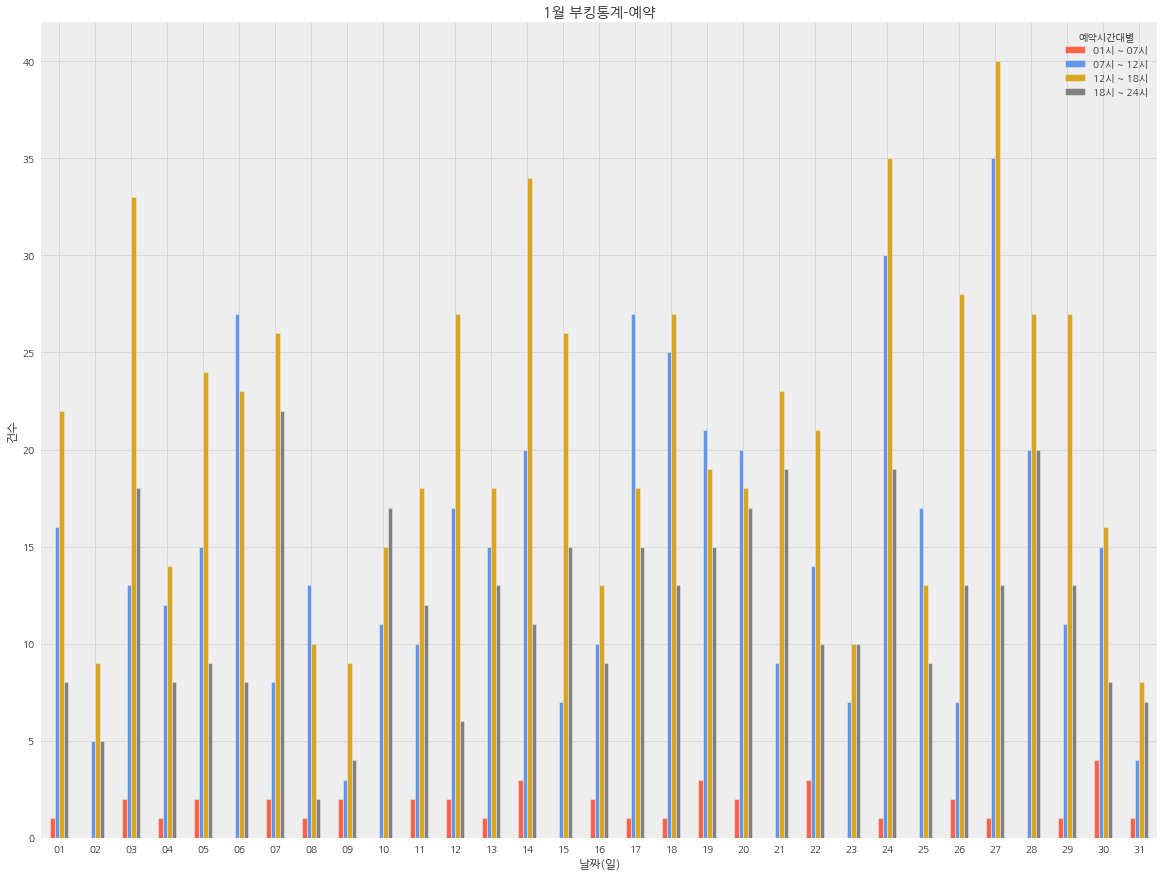

In [376]:
# 일별 
# 합계 제거
golf_re_df_day_bo = golf_re_df_day_bo.drop('합계', axis=1).drop('합계', axis=0).T

golf_re_df_day_bo.plot(kind="bar",figsize=(20,15), color=['tomato','cornflowerblue','goldenrod','grey'])
plt.title("1월 부킹통계-예약")
plt.xlabel("날짜(일)")
plt.ylabel("건수")
plt.xticks(rotation=0);
# plt.savefig('1월 일별 부킹통계-예약.png')

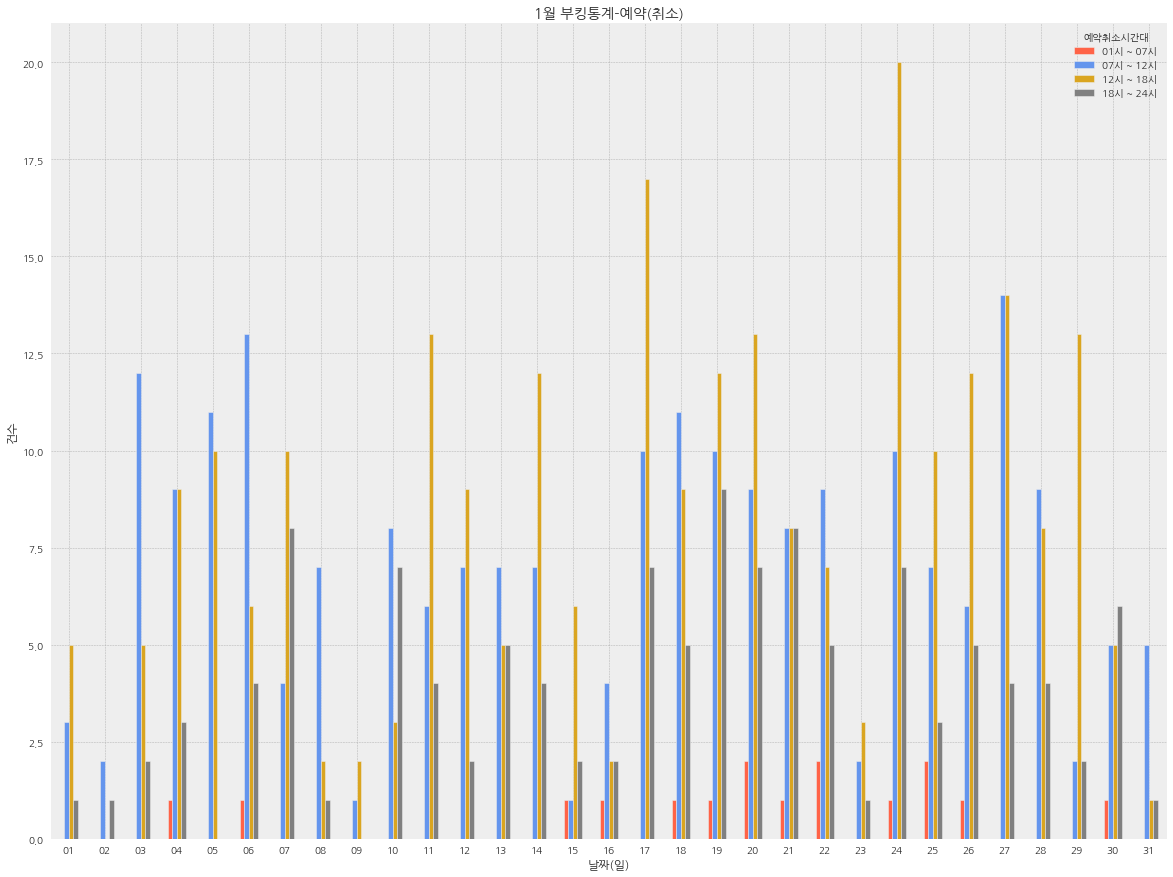

In [377]:
# 일별 취소 
# 합계 제거
golf_ex_df_day_bo = golf_ex_df_day_bo.drop('합계', axis=1).drop('합계', axis=0).T

golf_ex_df_day_bo.plot(kind="bar",figsize=(20,15), color=['tomato','cornflowerblue','goldenrod','grey'])
plt.title("1월 부킹통계-예약(취소)")
plt.xlabel("날짜(일)")
plt.ylabel("건수")
plt.xticks(rotation=0);
# plt.savefig('1월 일별 부킹통계-예약(취소)')

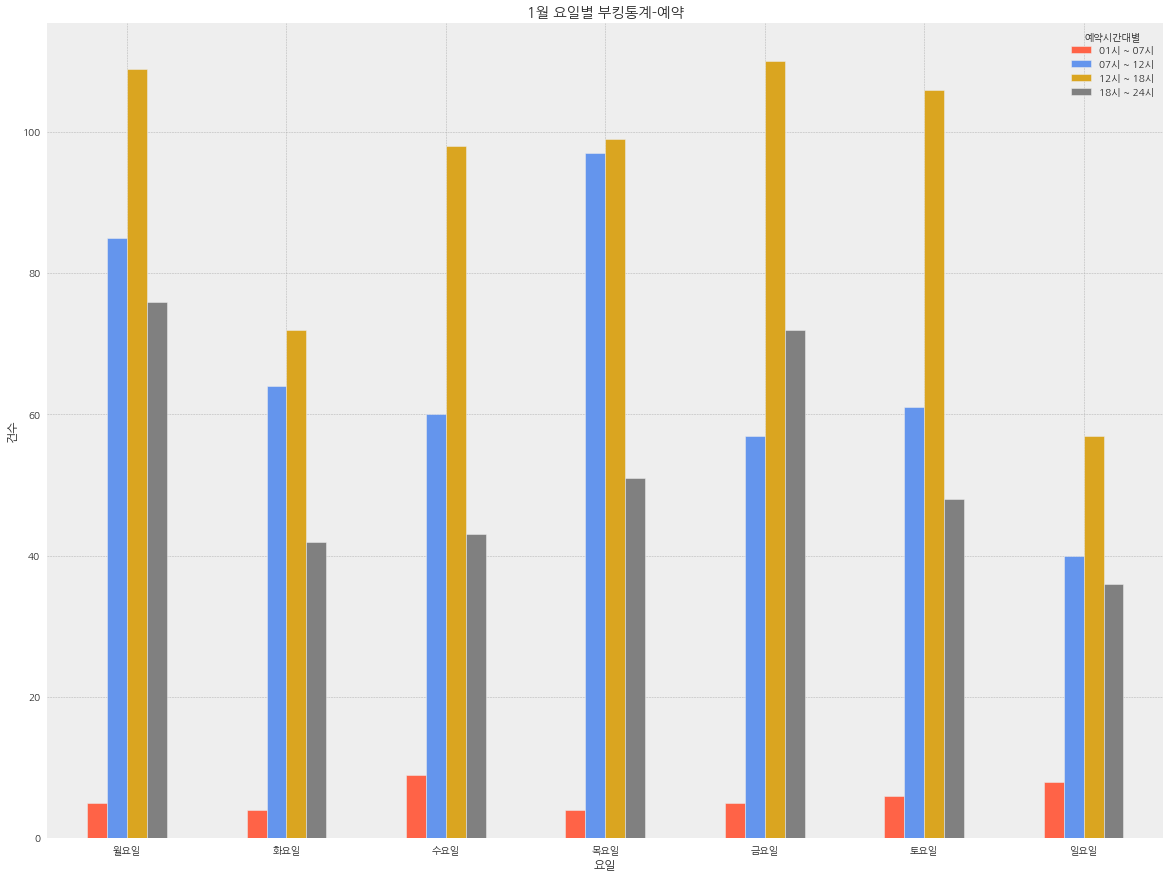

In [378]:
# 요일별 부킹 통계
golf_re_df_we_bo = golf_re_df_we_bo.drop('합계', axis=1).drop('합계', axis=0).T

golf_re_df_we_bo.plot(kind="bar",figsize=(20,15), color=['tomato','cornflowerblue','goldenrod','grey'])
plt.title("1월 요일별 부킹통계-예약")
plt.xlabel("요일")
plt.ylabel("건수")
plt.xticks(rotation=0);
# plt.savefig('1월 요일별 부킹통계-예약')

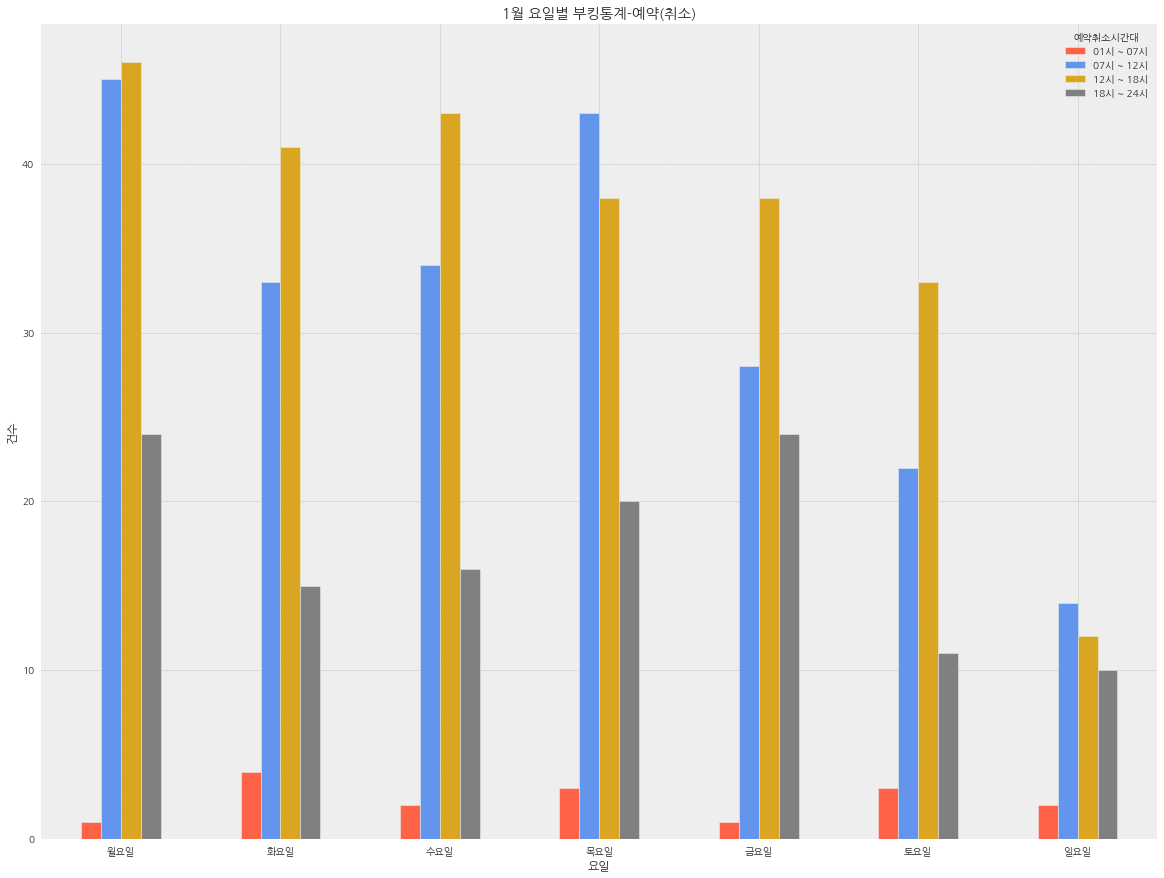

In [379]:
# 요일별 취소

golf_ex_df_we_bo = golf_ex_df_we_bo.drop('합계', axis=1).drop('합계', axis=0).T

golf_ex_df_we_bo.plot(kind="bar",figsize=(20,15), color=['tomato','cornflowerblue','goldenrod','grey'])
plt.title("1월 요일별 부킹통계-예약(취소)")
plt.xlabel("요일")
plt.ylabel("건수")
plt.xticks(rotation=0);
# plt.savefig('1월 요일별 부킹통계-예약(취소)')

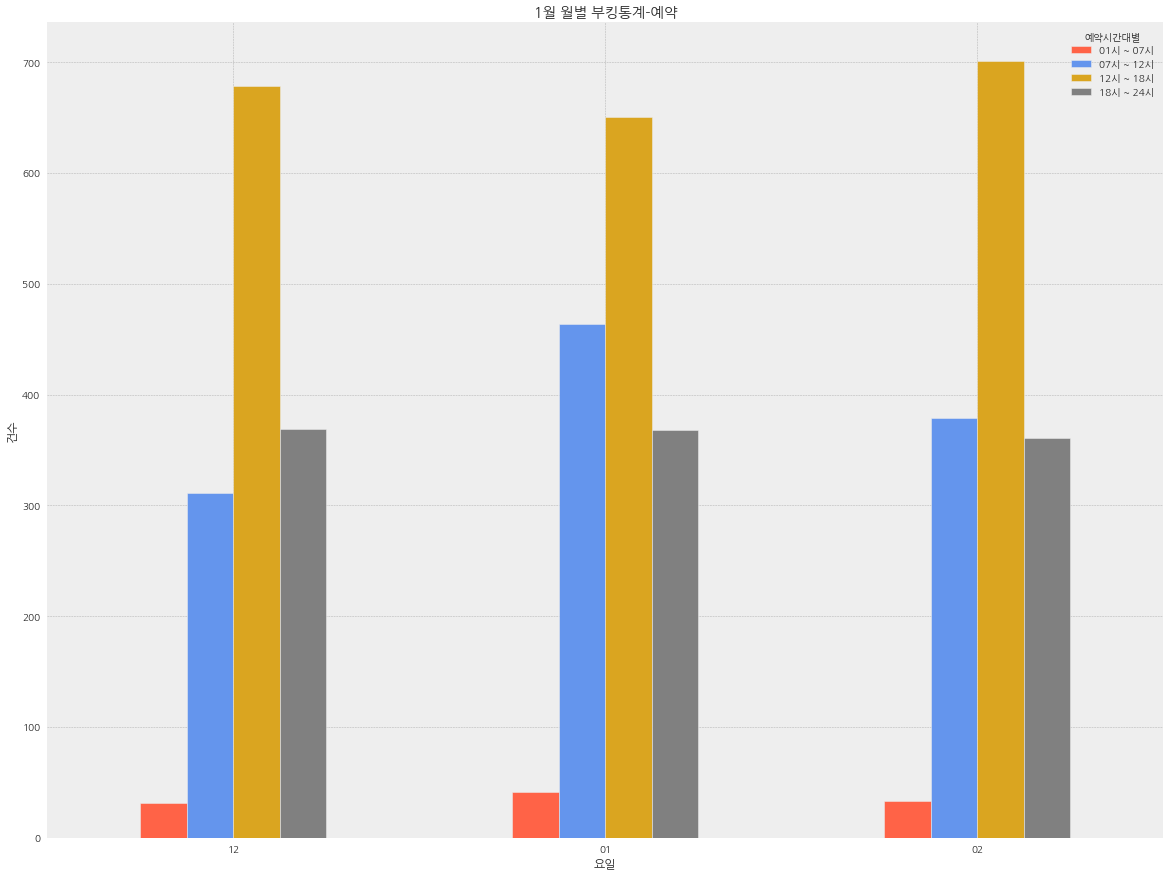

In [380]:
# 월별 부킹
golf_re_df_mon_bo = golf_re_df_mon_bo.drop('합계', axis=1).drop('합계', axis=0).T

golf_re_df_mon_bo.plot(kind="bar",figsize=(20,15), color=['tomato','cornflowerblue','goldenrod','grey'])
plt.title("1월 월별 부킹통계-예약")
plt.xlabel("요일")
plt.ylabel("건수")
plt.xticks(rotation=0);
# plt.savefig('1월 월별 부킹통계-예약')

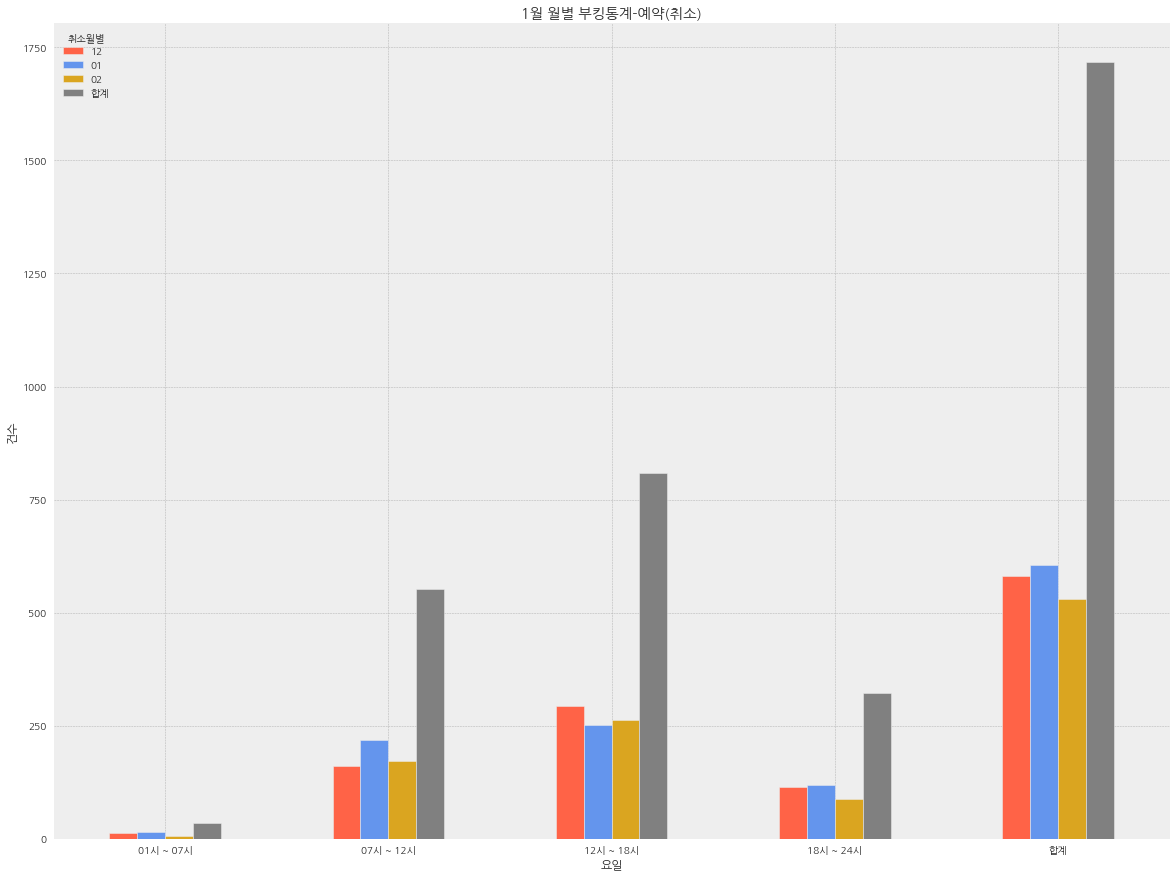

In [381]:
# 월별 부킹 취소
# golf_ex_df_mon_bo = golf_ex_df_mon_bo.drop('합계', axis=1).drop('합계', axis=0).T

golf_ex_df_mon_bo.plot(kind="bar",figsize=(20,15), color=['tomato','cornflowerblue','goldenrod','grey'])
plt.title("1월 월별 부킹통계-예약(취소)")
plt.xlabel("요일")
plt.ylabel("건수")
plt.xticks(rotation=0);
# plt.savefig('1월 월별 부킹통계-예약(취소)')

### 사전예약 / 취소

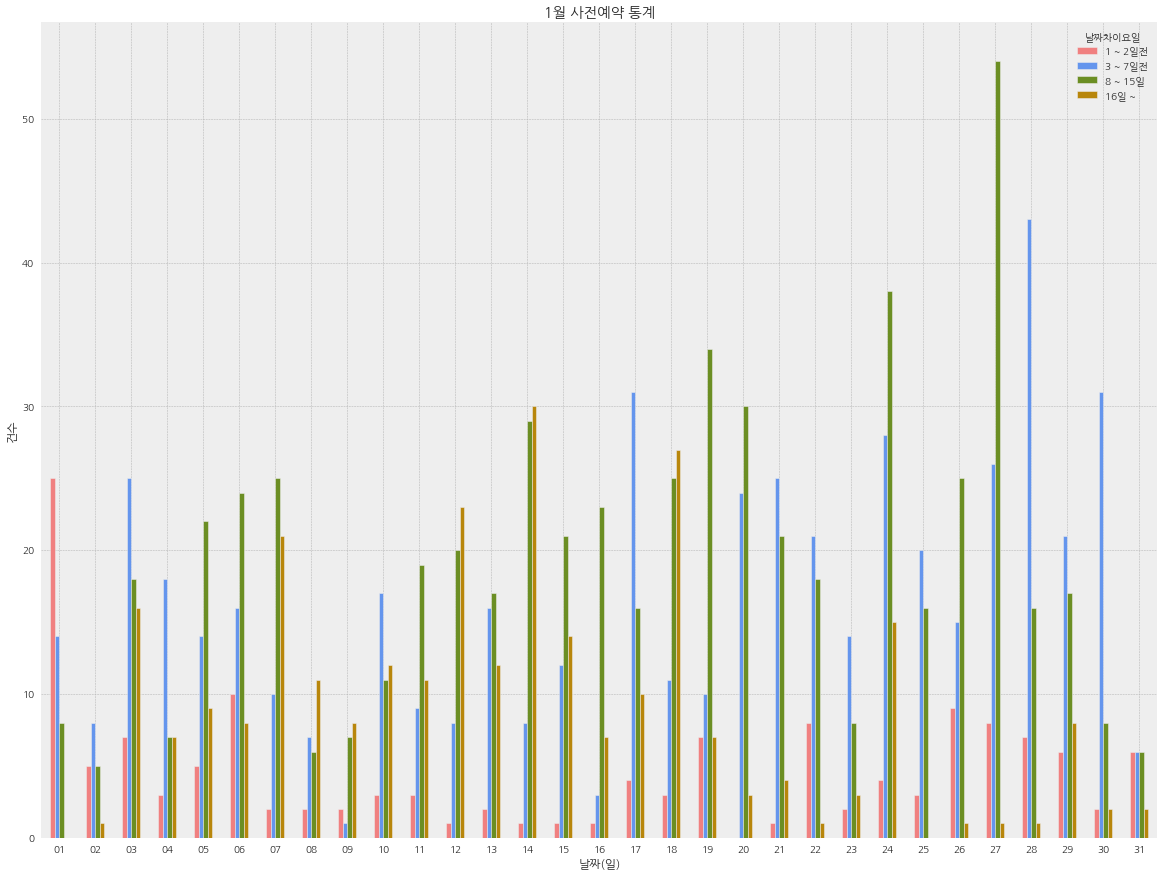

In [382]:
# 1월 일별 사전예약
golf_re_df_day_re = golf_re_df_day_re.drop('합계', axis=1).drop('합계', axis=0).T

golf_re_df_day_re.plot(kind="bar",figsize=(20,15), color=['lightcoral','cornflowerblue','olivedrab','darkgoldenrod'])
plt.title("1월 사전예약 통계")
plt.xlabel("날짜(일)")
plt.ylabel("건수")
plt.xticks(rotation=0);
# plt.savefig('1월 일별 사전예약통계.png')

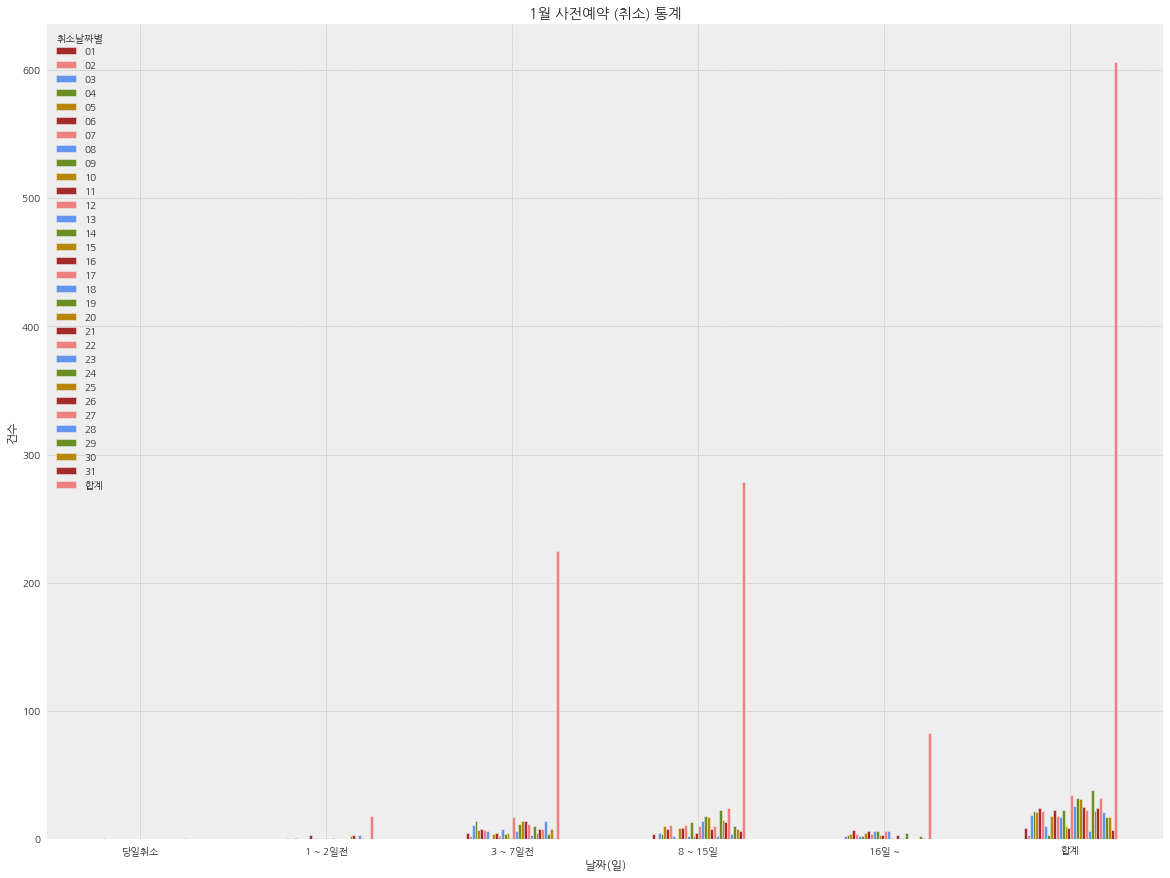

In [383]:
# 1월 일별 사전예약 취소
# golf_ex_df_day_re = golf_ex_df_day_re.drop('합계', axis=1).drop('합계', axis=0).T

golf_ex_df_day_re.plot(kind="bar",figsize=(20,15), color=['brown','lightcoral','cornflowerblue','olivedrab','darkgoldenrod'])
plt.title("1월 사전예약 (취소) 통계")
plt.xlabel("날짜(일)")
plt.ylabel("건수")
plt.xticks(rotation=0);
# plt.savefig('1월 일별 사전예약통계 - (취소).png')